In [1]:
import numpy as np
from astropy.table import Table
import pandas as pd
from astropy.cosmology import FlatLambdaCDM
import Curves2D
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from astropy.table import Table
import matplotlib.ticker as ticker
from scipy import interpolate

In [2]:
cosmo = FlatLambdaCDM(H0=67.77, Om0=0.307)

In [3]:
path_lin ='/home/ramiro/Facultad/Tesis/Datos/Actividad 07/' 
# path_win =

In [4]:
path_lin_fig = '/home/ramiro/Facultad/Tesis/Figuras/Actividad 8/'

In [5]:
table  = pd.read_csv(path_lin+'Aperturas_RefL0100N1504_snap_28_aperture_30.dat')
Ref    = table[(table['Stars_Mass']>=1e10)&(table['SF_Mass']>0)].copy()
Ref

,GalaxyID,GroupID,SnapNum,Redshift,SubGroupNumber,CentreOfPotential_x,CentreOfPotential_y,CentreOfPotential_z,Stars_Mass,SF_Mass,...,NSF_Hydrogen,NSF_Oxygen,NSF_Metallicity,StarFormationRate,InitialMassWeightedStellarAge,ApertureSize,Mass_Star,SFR_30pkpc,Group_R_Crit200,Group_M_Crit200
1,9508202,28000000000002,28,2.220446e-16,7,6.904262,35.705917,57.397373,7.604099e+10,2.281596e+09,...,0.727174,0.004796,0.011342,0.841832,9.455478,30,6.641890e+10,0.823222,1411.312012,3.002119e+14
2,9512113,28000000000002,28,2.220446e-16,8,8.682913,35.504921,54.217369,1.345128e+11,1.514760e+10,...,0.696796,0.010628,0.024796,12.094972,7.656161,30,1.183275e+11,10.984530,1411.312012,3.002119e+14
3,9517736,28000000000002,28,2.220446e-16,9,8.278317,37.063808,54.914932,2.232997e+10,2.754609e+09,...,0.714222,0.007443,0.017283,1.334875,8.117089,30,2.024596e+10,1.322288,1411.312012,3.002119e+14
24,14957972,28000000000002,28,2.220446e-16,5,6.932319,35.628769,56.786160,5.408647e+10,2.563663e+09,...,0.734066,0.003858,0.008299,1.392074,9.234837,30,4.320196e+10,0.999526,1411.312012,3.002119e+14
25,21573586,28000000000002,28,2.220446e-16,0,8.865488,35.284275,54.431995,1.665042e+12,3.504242e+10,...,0.744971,0.001391,0.003191,18.168200,9.314658,30,2.890146e+11,0.852622,1411.312012,3.002119e+14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13131,10365607,28000000002202,28,2.220446e-16,0,35.516003,10.797990,34.600616,1.226640e+10,1.538676e+09,...,0.740806,0.002266,0.005160,0.456897,7.618259,30,1.191011e+10,0.433110,179.046371,6.129222e+11
13145,10859653,28000000002570,28,2.220446e-16,0,61.355499,48.616516,65.236801,1.094640e+10,3.207207e+09,...,0.741599,0.002183,0.004858,1.192947,6.309848,30,1.063636e+10,1.192947,168.661011,5.124048e+11
13155,11104654,28000000002905,28,2.220446e-16,0,97.197350,82.709518,43.676567,1.200869e+10,1.247963e+09,...,0.743705,0.001579,0.003758,0.506203,6.814752,30,1.192049e+10,0.506203,159.761032,4.354551e+11
13164,11247394,28000000003127,28,2.220446e-16,0,88.764885,47.226864,81.905136,1.186733e+10,2.167418e+09,...,0.737761,0.002874,0.006602,0.686905,6.787498,30,1.124763e+10,0.604550,152.119400,3.759434e+11


In [6]:
SF_O  = Ref['SF_Oxygen']
SF_H  = Ref['SF_Hydrogen']
SF_M  = Ref['SF_Mass']
M_Star= Ref['Stars_Mass']

M_O_SF = SF_O*SF_M
M_H_SF = SF_H*SF_M

Ref['sf_metalicity'] = 12+np.log10(M_O_SF/(16*M_H_SF))
Ref

,GalaxyID,GroupID,SnapNum,Redshift,SubGroupNumber,CentreOfPotential_x,CentreOfPotential_y,CentreOfPotential_z,Stars_Mass,SF_Mass,...,NSF_Oxygen,NSF_Metallicity,StarFormationRate,InitialMassWeightedStellarAge,ApertureSize,Mass_Star,SFR_30pkpc,Group_R_Crit200,Group_M_Crit200,sf_metalicity
1,9508202,28000000000002,28,2.220446e-16,7,6.904262,35.705917,57.397373,7.604099e+10,2.281596e+09,...,0.004796,0.011342,0.841832,9.455478,30,6.641890e+10,0.823222,1411.312012,3.002119e+14,9.079824
2,9512113,28000000000002,28,2.220446e-16,8,8.682913,35.504921,54.217369,1.345128e+11,1.514760e+10,...,0.010628,0.024796,12.094972,7.656161,30,1.183275e+11,10.984530,1411.312012,3.002119e+14,9.246274
3,9517736,28000000000002,28,2.220446e-16,9,8.278317,37.063808,54.914932,2.232997e+10,2.754609e+09,...,0.007443,0.017283,1.334875,8.117089,30,2.024596e+10,1.322288,1411.312012,3.002119e+14,9.050028
24,14957972,28000000000002,28,2.220446e-16,5,6.932319,35.628769,56.786160,5.408647e+10,2.563663e+09,...,0.003858,0.008299,1.392074,9.234837,30,4.320196e+10,0.999526,1411.312012,3.002119e+14,9.087593
25,21573586,28000000000002,28,2.220446e-16,0,8.865488,35.284275,54.431995,1.665042e+12,3.504242e+10,...,0.001391,0.003191,18.168200,9.314658,30,2.890146e+11,0.852622,1411.312012,3.002119e+14,9.020433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13131,10365607,28000000002202,28,2.220446e-16,0,35.516003,10.797990,34.600616,1.226640e+10,1.538676e+09,...,0.002266,0.005160,0.456897,7.618259,30,1.191011e+10,0.433110,179.046371,6.129222e+11,9.085429
13145,10859653,28000000002570,28,2.220446e-16,0,61.355499,48.616516,65.236801,1.094640e+10,3.207207e+09,...,0.002183,0.004858,1.192947,6.309848,30,1.063636e+10,1.192947,168.661011,5.124048e+11,9.024783
13155,11104654,28000000002905,28,2.220446e-16,0,97.197350,82.709518,43.676567,1.200869e+10,1.247963e+09,...,0.001579,0.003758,0.506203,6.814752,30,1.192049e+10,0.506203,159.761032,4.354551e+11,9.286851
13164,11247394,28000000003127,28,2.220446e-16,0,88.764885,47.226864,81.905136,1.186733e+10,2.167418e+09,...,0.002874,0.006602,0.686905,6.787498,30,1.124763e+10,0.604550,152.119400,3.759434e+11,9.115270


In [8]:
# mask= (Ref['GroupID']==28000000000002)
df = Ref.copy()

In [9]:
df

,GalaxyID,GroupID,SnapNum,Redshift,SubGroupNumber,CentreOfPotential_x,CentreOfPotential_y,CentreOfPotential_z,Stars_Mass,SF_Mass,...,NSF_Oxygen,NSF_Metallicity,StarFormationRate,InitialMassWeightedStellarAge,ApertureSize,Mass_Star,SFR_30pkpc,Group_R_Crit200,Group_M_Crit200,sf_metalicity
1,9508202,28000000000002,28,2.220446e-16,7,6.904262,35.705917,57.397373,7.604099e+10,2.281596e+09,...,0.004796,0.011342,0.841832,9.455478,30,6.641890e+10,0.823222,1411.312012,3.002119e+14,9.079824
2,9512113,28000000000002,28,2.220446e-16,8,8.682913,35.504921,54.217369,1.345128e+11,1.514760e+10,...,0.010628,0.024796,12.094972,7.656161,30,1.183275e+11,10.984530,1411.312012,3.002119e+14,9.246274
3,9517736,28000000000002,28,2.220446e-16,9,8.278317,37.063808,54.914932,2.232997e+10,2.754609e+09,...,0.007443,0.017283,1.334875,8.117089,30,2.024596e+10,1.322288,1411.312012,3.002119e+14,9.050028
24,14957972,28000000000002,28,2.220446e-16,5,6.932319,35.628769,56.786160,5.408647e+10,2.563663e+09,...,0.003858,0.008299,1.392074,9.234837,30,4.320196e+10,0.999526,1411.312012,3.002119e+14,9.087593
25,21573586,28000000000002,28,2.220446e-16,0,8.865488,35.284275,54.431995,1.665042e+12,3.504242e+10,...,0.001391,0.003191,18.168200,9.314658,30,2.890146e+11,0.852622,1411.312012,3.002119e+14,9.020433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13131,10365607,28000000002202,28,2.220446e-16,0,35.516003,10.797990,34.600616,1.226640e+10,1.538676e+09,...,0.002266,0.005160,0.456897,7.618259,30,1.191011e+10,0.433110,179.046371,6.129222e+11,9.085429
13145,10859653,28000000002570,28,2.220446e-16,0,61.355499,48.616516,65.236801,1.094640e+10,3.207207e+09,...,0.002183,0.004858,1.192947,6.309848,30,1.063636e+10,1.192947,168.661011,5.124048e+11,9.024783
13155,11104654,28000000002905,28,2.220446e-16,0,97.197350,82.709518,43.676567,1.200869e+10,1.247963e+09,...,0.001579,0.003758,0.506203,6.814752,30,1.192049e+10,0.506203,159.761032,4.354551e+11,9.286851
13164,11247394,28000000003127,28,2.220446e-16,0,88.764885,47.226864,81.905136,1.186733e+10,2.167418e+09,...,0.002874,0.006602,0.686905,6.787498,30,1.124763e+10,0.604550,152.119400,3.759434e+11,9.115270


## Graficar 12+log10(O/H) vs log10(Mstar) (scatter plot + medianas + percentiles 25th y 75th).

In [10]:
mask = (df['sf_metalicity'].notna())
xvar = np.log10(df['Stars_Mass'])[mask].to_numpy()
yvar = df['sf_metalicity'][mask].to_numpy()

# maskgroup = (df['GroupID']==28000000000002)

# xvargroup = np.log10(df['Stars_Mass'])[maskgroup].to_numpy()
# yvargroup = df['sf_metalicity'][maskgroup].to_numpy()

In [11]:
nbins=10        # Numero de bins en variable x a usar para dividir la muestra
perc_low=25.        # Percentil a usar como cota inferior de error
perc_high=75.       # Percentil a usar como cota superior de error
min_count=10         # Mínima cantidad de elementos para considerar en un bin

xmedian,ymedian,xerror,yerror,elements=Curves2D.median_curve(xvar,yvar,bins=nbins,min_count=min_count,perc_low=perc_low,perc_high=perc_high)

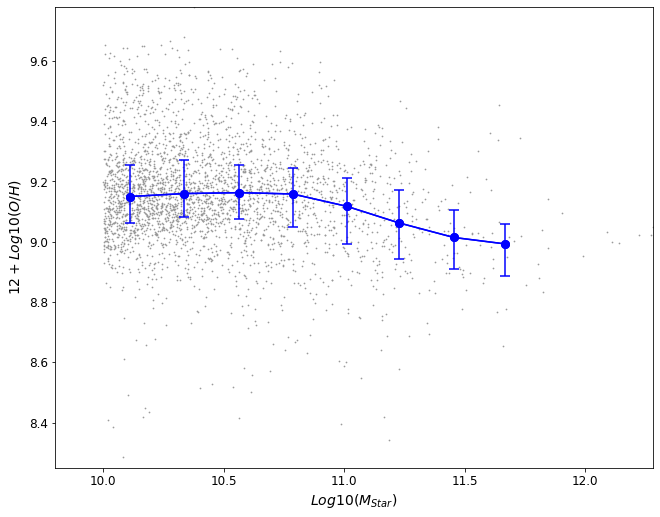

In [12]:
fig,ax=plt.subplots(figsize=(10,8))

xlim=(9.8,max(xvar))
ylim=(8.25,max(yvar))

xlabel=r'$Log10(M_{Star})$'
ylabel=r'$12 + Log10(O/H)$'

ax.set_xlabel(xlabel,fontsize=14)
ax.set_ylabel(ylabel,fontsize=14)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.tick_params(axis='both', which='major', labelsize=12)
                
plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

# scatter plot
ax.scatter(xvar,yvar,marker='o',s=0.5,c='0.6',label='Scatter plot')

# ax.scatter(xvargroup,yvargroup,marker='o',s=6,c='r',label='Scatter plot')


ax.plot(xmedian,ymedian,c='b',marker='o',ms=8,linestyle='-',linewidth=1.5,label='Median relation')

ax.errorbar(xmedian,ymedian,yerr=yerror,
           c='b',marker='o',markersize=8,linestyle='-',
           linewidth=1.5,label='Median relation',capsize=5,capthick=1.5)

# leg1=ax.legend(edgecolor='0.1',loc='upper left',handlelength=4,fontsize=12)
# leg1.set_title(r'$\rm{EAGLE\ RefL0100N1504},\ z=0$',prop={'size':13})

# ax.add_artist(leg1)
# plt.savefig(path_lin_fig+'scatter_log(M)vs_metalicidad.png')


plt.show()

## Creamos dos dataframes, uno para el last mayor maerger y otro para el último merger

In [13]:
LAST_MM    = pd.read_csv('last_major_merger_tesis.dat')
LAST_M     = pd.read_csv('last_merger_tesis.dat')
LAST_MINOR = pd.read_csv('last_minor_merger_tesis.dat')

In [14]:
LAST_M['tiempo']     = cosmo.age(LAST_M['Redshift']).value
LAST_MM['tiempo']    = cosmo.age(LAST_MM['Redshift']).value
LAST_MINOR['tiempo'] = cosmo.age(LAST_MINOR['Redshift_Minor']).value

In [15]:
DF_MM    = pd.merge(left= df,right=LAST_MM, left_on='GalaxyID', right_on='GalaxyID_test')
DF_M     = pd.merge(left= df,right=LAST_M, left_on='GalaxyID', right_on='GalaxyID_test')
DF_MINOR = pd.merge(left= df,right=LAST_MINOR, left_on='GalaxyID', right_on='GalaxyID_test')

In [17]:
DF_MINOR

,GalaxyID,GroupID,SnapNum,Redshift,SubGroupNumber,CentreOfPotential_x,CentreOfPotential_y,CentreOfPotential_z,Stars_Mass,SF_Mass,...,Mass_Star,SFR_30pkpc,Group_R_Crit200,Group_M_Crit200,sf_metalicity,GalaxyID_test,Snap_Last_Minor_Merger,L_Last_Minor_Merger,Redshift_Minor,tiempo
0,9508202,28000000000002,28,2.220446e-16,7,6.904262,35.705917,57.397373,7.604099e+10,2.281596e+09,...,6.641890e+10,0.823222,1411.312012,3.002119e+14,9.079824,9508202,19,1.325888,1.00,5.880506
1,9512113,28000000000002,28,2.220446e-16,8,8.682913,35.504921,54.217369,1.345128e+11,1.514760e+10,...,1.183275e+11,10.984530,1411.312012,3.002119e+14,9.246274,9512113,24,1.545426,0.37,9.660497
2,9517736,28000000000002,28,2.220446e-16,9,8.278317,37.063808,54.914932,2.232997e+10,2.754609e+09,...,2.024596e+10,1.322288,1411.312012,3.002119e+14,9.050028,9517736,28,1.149819,0.00,13.820530
3,14957972,28000000000002,28,2.220446e-16,5,6.932319,35.628769,56.786160,5.408647e+10,2.563663e+09,...,4.320196e+10,0.999526,1411.312012,3.002119e+14,9.087593,14957972,15,1.218410,2.01,3.280058
4,21573586,28000000000002,28,2.220446e-16,0,8.865488,35.284275,54.431995,1.665042e+12,3.504242e+10,...,2.890146e+11,0.852622,1411.312012,3.002119e+14,9.020433,21573586,13,2.372777,2.48,2.650799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,10135222,28000000001965,28,2.220446e-16,0,51.437836,63.900665,42.295963,1.877612e+10,1.868753e+09,...,1.834852e+10,0.781151,187.863800,7.080275e+11,9.262727,10135222,13,103.413284,2.48,2.650799
2350,10171253,28000000002000,28,2.220446e-16,0,42.221169,36.785053,6.773433,1.296307e+10,3.287346e+09,...,1.256924e+10,1.093272,182.631577,6.505136e+11,9.086649,10171253,18,1.278225,1.26,4.956202
2351,10297940,28000000002130,28,2.220446e-16,0,35.304821,40.036884,94.928513,1.270824e+10,1.074099e+09,...,1.220016e+10,0.552186,168.885712,5.144343e+11,9.194826,10297940,17,1.108076,1.49,4.317096
2352,10859653,28000000002570,28,2.220446e-16,0,61.355499,48.616516,65.236801,1.094640e+10,3.207207e+09,...,1.063636e+10,1.192947,168.661011,5.124048e+11,9.024783,10859653,13,1.179028,2.48,2.650799


# DataFrame para las galaxias que no sufrieron mergers, hasta minor.

In [16]:
DM_NON = df[df['GalaxyID'].isin(DF_MINOR['GalaxyID'])==False].copy()
DM_NON

,GalaxyID,GroupID,SnapNum,Redshift,SubGroupNumber,CentreOfPotential_x,CentreOfPotential_y,CentreOfPotential_z,Stars_Mass,SF_Mass,...,NSF_Oxygen,NSF_Metallicity,StarFormationRate,InitialMassWeightedStellarAge,ApertureSize,Mass_Star,SFR_30pkpc,Group_R_Crit200,Group_M_Crit200,sf_metalicity
149,12181021,28000000000029,28,2.220446e-16,6,24.292686,66.522194,10.640058,2.041890e+10,5.198896e+08,...,0.022200,0.053275,0.567896,7.849344,30,1.914155e+10,0.565336,672.236206,3.244126e+13,9.390766
150,12182126,28000000000029,28,2.220446e-16,7,24.664011,65.392387,10.163819,1.332036e+10,5.988550e+08,...,0.021326,0.056815,0.326175,6.798471,30,1.324029e+10,0.326175,672.236206,3.244126e+13,9.461887
233,11500509,28000000000011,28,2.220446e-16,2,12.465079,76.477203,45.647526,3.551365e+10,6.678082e+09,...,0.004007,0.009116,2.382707,7.722117,30,3.470260e+10,2.254229,901.221375,7.816545e+13,9.133557
278,13624663,28000000000089,28,2.220446e-16,1,75.435272,22.670961,30.497990,3.602385e+10,1.632416e+09,...,0.020931,0.053693,0.772549,8.177368,30,3.537392e+10,0.772549,531.989746,1.607768e+13,9.426131
279,13626220,28000000000089,28,2.220446e-16,2,75.485817,23.039257,29.832651,1.244061e+10,1.425977e+09,...,0.014462,0.034549,0.647730,7.472853,30,1.210162e+10,0.647730,531.989746,1.607768e+13,9.243244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12951,168529,28000000000060,28,2.220446e-16,6,70.051186,57.015957,71.640083,2.235128e+10,9.976772e+07,...,0.002741,0.005790,0.038511,10.412677,30,2.234217e+10,0.038511,622.656006,2.577956e+13,8.927000
12994,1419938,28000000000163,28,2.220446e-16,1,46.066406,90.351860,46.062160,1.591779e+10,3.709340e+09,...,0.001026,0.002267,1.799886,7.351580,30,1.591321e+10,1.795146,457.689453,1.023881e+13,8.849154
13064,8679932,28000000000847,28,2.220446e-16,2,38.723789,67.395233,19.465799,1.056090e+10,2.471373e+09,...,0.006036,0.014041,1.293262,5.873243,30,1.041372e+10,1.293262,209.637512,9.838787e+11,9.136630
13088,9173508,28000000001322,28,2.220446e-16,1,46.088234,33.779934,83.578041,1.134917e+10,1.309800e+09,...,0.001268,0.002887,0.461896,7.784649,30,1.126931e+10,0.455811,218.849655,1.119376e+12,9.092166


In [17]:
mask = (DM_NON['sf_metalicity'].notna())
xvar_non = np.log10(DM_NON['Stars_Mass'])[mask].to_numpy()
yvar_non = DM_NON['sf_metalicity'][mask].to_numpy()

In [18]:
nbins=10        # Numero de bins en variable x a usar para dividir la muestra
perc_low=25.        # Percentil a usar como cota inferior de error
perc_high=75.       # Percentil a usar como cota superior de error
min_count=5         # Mínima cantidad de elementos para considerar en un bin

xmedian_non,ymedian_non,xerror_non,yerror_non,elements=Curves2D.median_curve(xvar_non,yvar_non,bins=nbins,min_count=min_count,perc_low=perc_low,perc_high=perc_high)

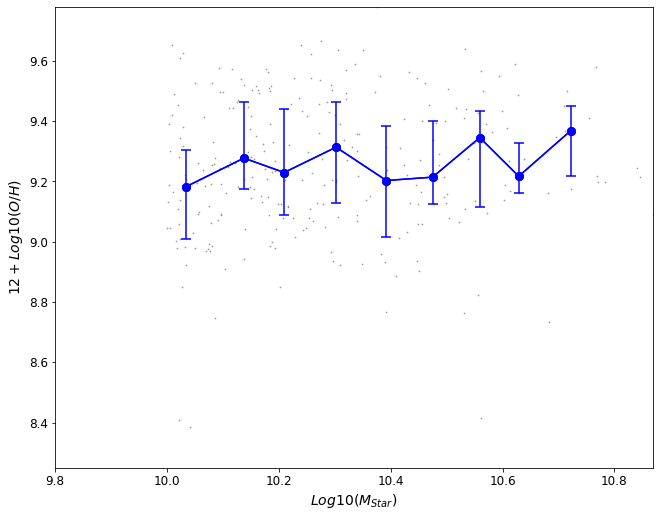

In [19]:
fig,ax=plt.subplots(figsize=(10,8))

xlim=(9.8,max(xvar_non))
ylim=(8.25,max(yvar_non))

xlabel=r'$Log10(M_{Star})$'
ylabel=r'$12 + Log10(O/H)$'

ax.set_xlabel(xlabel,fontsize=14)
ax.set_ylabel(ylabel,fontsize=14)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.tick_params(axis='both', which='major', labelsize=12)
                
plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

# scatter plot
ax.scatter(xvar_non,yvar_non,marker='o',s=0.5,c='0.6',label='Scatter plot')

# ax.scatter(xvargroup,yvargroup,marker='o',s=6,c='r',label='Scatter plot')


ax.plot(xmedian_non,ymedian_non,c='b',marker='o',ms=8,linestyle='-',linewidth=1.5,label='Median relation')

ax.errorbar(xmedian_non,ymedian_non,yerr=yerror_non,
           c='b',marker='o',markersize=8,linestyle='-',
           linewidth=1.5,label='Median relation',capsize=5,capthick=1.5)

# leg1=ax.legend(edgecolor='0.1',loc='upper left',handlelength=4,fontsize=12)
# leg1.set_title(r'$\rm{EAGLE\ RefL0100N1504},\ z=0$',prop={'size':13})

# ax.add_artist(leg1)
# plt.savefig(path_lin_fig+'scatter_log(M)vs_metalicidad.png')


plt.show()

# Analizamos colormaps desde micro mergers

In [25]:
from matplotlib import colors

In [26]:
# Medianas para micro mergers

mask = (DF_MINOR['sf_metalicity'].notna())
xvar_lmicro = np.log10(DF_MINOR['Stars_Mass'])[mask].to_numpy()
yvar_lmicro = DF_MINOR['sf_metalicity'][mask].to_numpy()

nbins=10        # Numero de bins en variable x a usar para dividir la muestra
perc_low=25.        # Percentil a usar como cota inferior de error
perc_high=75.       # Percentil a usar como cota superior de error
min_count=10         # Mínima cantidad de elementos para considerar en un bin

xmedian_lmicro,ymedian_lmicro,xerror_lmicro,yerror_lmicro,elements=Curves2D.median_curve(xvar_lmicro,yvar_lmicro,bins=nbins,min_count=min_count,perc_low=perc_low,perc_high=perc_high)

## t_lm:

In [29]:
astro_merge = Table(data=np.array(DF_MINOR),names=DF_MINOR.keys())

# Condiciones para seleccionar muestra
mask=(astro_merge['L_Last_Minor_Merger']<5)&(astro_merge['Redshift_Minor']<3.5)

data={}
for key in astro_merge.keys():
    data[key]=astro_merge[key][mask]

# Parámetro que colorea
parametro= 'tiempo'

# Variables (ejes) a graficar
xplot = np.log10(data['Stars_Mass'])
yplot = data['sf_metalicity']

xlabel= r'$log(M_\bigstar)~[\rm{M}_\odot]$'
ylabel= r'$12+log(O/H)$'

In [30]:
#-------------------- Variables para pintar grilla 2D-----------------------------------------------
# Variable a usar para colorear
var_color=data[parametro]

# Estadístico a usar ('counts','mean','median')
statistic='median'

# 'counts' es para contar el número de galaxias en cada bin (digamos, es para hacer un histograma2D)
# 'mean' y 'median' son para calcular la media o la mediana de var en cada bin.
           
# Label to use in color bar reference
var_label=r'$t_{lm}~[Gyr]$'

# Número de bines en cada eje
nbinsx=20
nbinsy=30
    
# Minimum number of galaxies to color bin (bins with less galaxies than this value will
# not be taken into account)
cmin=4

# Color map to use. Use 'mapname_r' to invert colours. For example, if want to
# invert the color map "jet", use "jet_r".
cmap='jet_r'

<ipython-input-31-2c3cc0a59856>:79: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet_r"))
  cmap.set_under('white')                      # "bad-defined" bins will be of colour white.


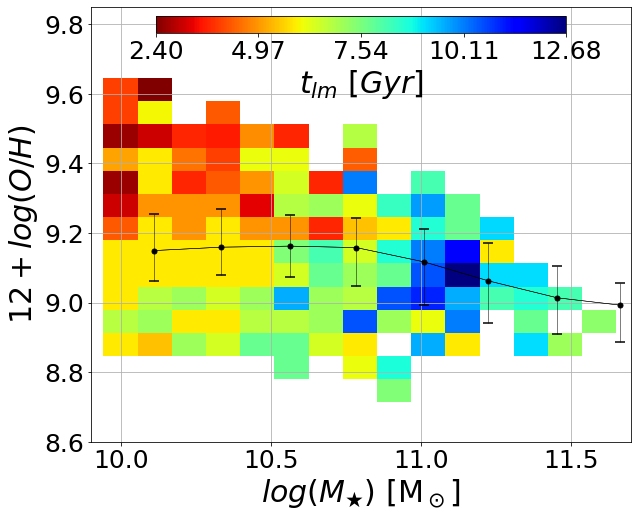

In [31]:
# Plot color map
fig,ax=plt.subplots(figsize=(10,8))

# Intervals of binning, as function of nbinsx and nbinsy:
intx=(max(xplot)-min(xplot))/nbinsx
inty=(max(yplot)-min(yplot))/nbinsy

# If 'var_color' is an empty sequence or 'statistic=='counts'', plot a 2D histogram. 
if (var_color==[]) or (statistic=='counts'):   
    # Min and Max of each variable
    xmin,xmax=min(xplot),max(xplot)
    xlim=[xmin,xmax]

    ymin,ymax=min(yplot),max(yplot)
    ylim=[ymin,ymax]
        
    # Construct the 2D histogram
    hist2d,xedges,yedges,im=ax.hist2d(xplot, yplot, bins=(nbinsx,nbinsy),cmap=cmap,
                                      range=(xlim,ylim),cmin=cmin)
    var_label='N'
        
# If not want to plot a 2D histogram, construct the color map
else:
            #Define a "density" array of 2x2 used for binning. Its elements will be the values of the statistic
            density=np.zeros((nbinsy+1,nbinsx+1))    # NOTE THE TRANSPOSITION OF AXIS! It is done like this in
                                                     # order to use 'meshgrid' later.

            # Calculate the desired statistic in each bin
            auxx=min(xplot)
            for i in range(nbinsx+1):
                auxy=min(yplot)
                for j in range(nbinsy+1):
                    # Select data of elements that belong to the bin
                    var=var_color[(xplot >= auxx) & (xplot < auxx+intx) & (yplot >= auxy) & (yplot < auxy+inty)]
                    # Calculate the statistic in the bin, if there are at least cmin elements inside the bin.
                    if (var.size >=cmin):
                        if statistic=='mean':
                            stat_val=np.mean(var)
                        elif statistic=='median':
                            stat_val=np.median(var)                        
                    # If not enough elements in the bin, assign the value -1e99 to the statistic        
                    else:
                        stat_val=-1e99
                
                    # Overwrite the [j,i] element (bin) of density array with the calculated statistic
                    density[j,i]=stat_val
                    auxy=auxy+inty
                auxx=auxx+intx

            # Define x-coordinates of 2D grid
            x=np.zeros(nbinsx+1)
            auxx=min(xplot)
            for i in range(nbinsx+1):
                x[i]=auxx
                auxx=auxx+intx
            
            # Define y-coordinates of 2D grid
            y=np.zeros(nbinsy+1)
            auxy=min(yplot)
            for j in range(nbinsy+1):
                y[j]=auxy
                auxy=auxy+inty

            # Construct two 2D array with grid coordinates
            x,y=np.meshgrid(x,y)

            # Define again the density (statistic) array
            z=density
        
            # IMPORTANT!!: x, y, z MUST have the same shape.

            # Search min and max of statistic, considering only bins with "well-defined" statistic
            densitylim=density[density > -1e99]
            vmin=np.amin(densitylim)
            vmax=np.amax(densitylim)

            # Prepare the color map
            cmap = plt.get_cmap(cmap)       # Name of the color map
            cmap.set_under('white')                      # "bad-defined" bins will be of colour white. 
            norm = colors.Normalize(vmin=vmin, vmax=vmax, clip=False)    # Normalize colors to the interval (vmin,vmax)

            # Construct color grid
            im=ax.pcolormesh(x,y,z,cmap=cmap,norm=norm,shading='auto')                     

# Barra de referencia y "tuneo" del gráfico
# Add an axis that will contain the color bar 
cbaxes=ax.inset_axes([0.12,0.94,0.76,0.04]) 

# Construct color bar using the color grid (object 'im')
cbar=plt.colorbar(im,cax=cbaxes,orientation='horizontal')   
cbar.set_label(var_label,fontsize=30)    # Label of color bar
cbaxes.tick_params(axis='both', which='major', labelsize=25)   # Size of ticks labels

# Number of ticks in color bar
loc = ticker.LinearLocator(numticks=5)   # For simplicity, use always linear-separated ticks in the color bar
cbar.locator=loc
cbar.update_ticks()
if (var_color==[]) or (statistic=='counts'):   # Format the string of color bar ticks label
    cbaxes.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))
else:
    cbaxes.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))
    
# Ajustar cosas del gráfico
ax.set_xlabel(xlabel,fontsize=30)
ax.set_ylabel(ylabel,fontsize=30)

# xmin,xmax=min(xplot)-0.3,max(xplot)+0.2
xmin,xmax = 9.9,11.7
ax.set_xlim(xmin,xmax)

# ymin,ymax=min(yplot)+0.2,max(yplot)+0.5
ymin,ymax= 8.6,9.85
ax.set_ylim(ymin,ymax)

ax.tick_params(axis='both',labelsize=25)

# Ploteamos las medianas de las galaxias en el plano MZR
ax.plot(xmedian,ymedian,c='k',marker='o',ms=5,linestyle='-',linewidth=0.5,label='Median relation')
ax.errorbar(xmedian,ymedian,yerr=yerror,c='k',marker='o',markersize=2,linestyle='-',linewidth=0.5,label='Median relation',capsize=5,capthick=1.5)

# Ploteamos las medianas de las galaxias que sufrieron un mergers, desde z=3.2
# ax.plot(xmedian_lmicro,ymedian_lmicro,c='b',marker='o',ms=2,linestyle='--',linewidth=0.5,label='Median relation of galaxis of last mergers')
# ax.errorbar(xmedian_lmicro,ymedian_lmicro,yerr=yerror_lmicro,c='k',marker='o',markersize=2,linestyle='--',linewidth=0.5,label='Median relation',capsize=5,capthick=1.5)

# Ploteamos las medianas de las galaxias que no sufrieron un mergers, desde z=3.2
# ax.plot(xmedian_non,ymedian_non,c='r',marker='o',ms=5,linestyle='--',linewidth=0.5,label='Median relation of galaxis of last mergers')
# ax.errorbar(xmedian_non,ymedian_non,yerr=yerror_non,c='r',marker='o',markersize=5,linestyle='--',linewidth=0.5,label='Median relation',capsize=5,capthick=1.5)



plt.grid(True)
plt.subplots_adjust(left=0.15)

# Guardar la figura, si es necesario
# plt.savefig(path_lin_fig+'Mstar_matalicidad_tlm_RefL0100N1504_snap28.pdf')
    
plt.show()

## Z_lm:

In [32]:
astro_merge = Table(data=np.array(DF_MINOR),names=DF_MINOR.keys())

# Condiciones para seleccionar muestra
mask=(astro_merge['L_Last_Minor_Merger']<5)&(astro_merge['Redshift_Minor']<3.5)

data={}
for key in astro_merge.keys():
    data[key]=astro_merge[key][mask]

# Parámetro que colorea
parametro= 'Redshift_Minor'

# Variables (ejes) a graficar
xplot = np.log10(data['Stars_Mass'])
yplot = data['sf_metalicity']

xlabel= r'$log(M_\bigstar)~[\rm{M}_\odot]$'
ylabel= r'$12+log(O/H)$'

In [33]:
#-------------------- Variables para pintar grilla 2D-----------------------------------------------
# Variable a usar para colorear
var_color=data[parametro]

# Estadístico a usar ('counts','mean','median')
statistic='median'

# 'counts' es para contar el número de galaxias en cada bin (digamos, es para hacer un histograma2D)
# 'mean' y 'median' son para calcular la media o la mediana de var en cada bin.
           
# Label to use in color bar reference
var_label=r'$z_{lm}$'

# Número de bines en cada eje
nbinsx=20
nbinsy=30
    
# Minimum number of galaxies to color bin (bins with less galaxies than this value will
# not be taken into account)
cmin=4

# Color map to use. Use 'mapname_r' to invert colours. For example, if want to
# invert the color map "jet", use "jet_r".
cmap='jet_r'

<ipython-input-35-6263c7f4e08d>:79: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet_r"))
  cmap.set_under('white')                      # "bad-defined" bins will be of colour white.


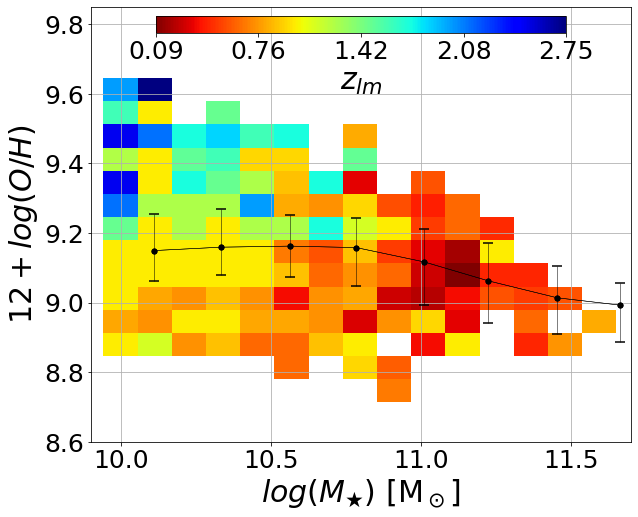

In [35]:
# Plot color map
fig,ax=plt.subplots(figsize=(10,8))

# Intervals of binning, as function of nbinsx and nbinsy:
intx=(max(xplot)-min(xplot))/nbinsx
inty=(max(yplot)-min(yplot))/nbinsy

# If 'var_color' is an empty sequence or 'statistic=='counts'', plot a 2D histogram. 
if (var_color==[]) or (statistic=='counts'):   
    # Min and Max of each variable
    xmin,xmax=min(xplot),max(xplot)
    xlim=[xmin,xmax]

    ymin,ymax=min(yplot),max(yplot)
    ylim=[ymin,ymax]
        
    # Construct the 2D histogram
    hist2d,xedges,yedges,im=ax.hist2d(xplot, yplot, bins=(nbinsx,nbinsy),cmap=cmap,
                                      range=(xlim,ylim),cmin=cmin)
    var_label='N'
        
# If not want to plot a 2D histogram, construct the color map
else:
            #Define a "density" array of 2x2 used for binning. Its elements will be the values of the statistic
            density=np.zeros((nbinsy+1,nbinsx+1))    # NOTE THE TRANSPOSITION OF AXIS! It is done like this in
                                                     # order to use 'meshgrid' later.

            # Calculate the desired statistic in each bin
            auxx=min(xplot)
            for i in range(nbinsx+1):
                auxy=min(yplot)
                for j in range(nbinsy+1):
                    # Select data of elements that belong to the bin
                    var=var_color[(xplot >= auxx) & (xplot < auxx+intx) & (yplot >= auxy) & (yplot < auxy+inty)]
                    # Calculate the statistic in the bin, if there are at least cmin elements inside the bin.
                    if (var.size >=cmin):
                        if statistic=='mean':
                            stat_val=np.mean(var)
                        elif statistic=='median':
                            stat_val=np.median(var)                        
                    # If not enough elements in the bin, assign the value -1e99 to the statistic        
                    else:
                        stat_val=-1e99
                
                    # Overwrite the [j,i] element (bin) of density array with the calculated statistic
                    density[j,i]=stat_val
                    auxy=auxy+inty
                auxx=auxx+intx

            # Define x-coordinates of 2D grid
            x=np.zeros(nbinsx+1)
            auxx=min(xplot)
            for i in range(nbinsx+1):
                x[i]=auxx
                auxx=auxx+intx
            
            # Define y-coordinates of 2D grid
            y=np.zeros(nbinsy+1)
            auxy=min(yplot)
            for j in range(nbinsy+1):
                y[j]=auxy
                auxy=auxy+inty

            # Construct two 2D array with grid coordinates
            x,y=np.meshgrid(x,y)

            # Define again the density (statistic) array
            z=density
        
            # IMPORTANT!!: x, y, z MUST have the same shape.

            # Search min and max of statistic, considering only bins with "well-defined" statistic
            densitylim=density[density > -1e99]
            vmin=np.amin(densitylim)
            vmax=np.amax(densitylim)

            # Prepare the color map
            cmap = plt.get_cmap(cmap)       # Name of the color map
            cmap.set_under('white')                      # "bad-defined" bins will be of colour white. 
            norm = colors.Normalize(vmin=vmin, vmax=vmax, clip=False)    # Normalize colors to the interval (vmin,vmax)

            # Construct color grid
            im=ax.pcolormesh(x,y,z,cmap=cmap,norm=norm,shading='auto')                     

# Barra de referencia y "tuneo" del gráfico
# Add an axis that will contain the color bar 
cbaxes=ax.inset_axes([0.12,0.94,0.76,0.04]) 

# Construct color bar using the color grid (object 'im')
cbar=plt.colorbar(im,cax=cbaxes,orientation='horizontal')   
cbar.set_label(var_label,fontsize=30)    # Label of color bar
cbaxes.tick_params(axis='both', which='major', labelsize=25)   # Size of ticks labels

# Number of ticks in color bar
loc = ticker.LinearLocator(numticks=5)   # For simplicity, use always linear-separated ticks in the color bar
cbar.locator=loc
cbar.update_ticks()
if (var_color==[]) or (statistic=='counts'):   # Format the string of color bar ticks label
    cbaxes.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))
else:
    cbaxes.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))
    
# Ajustar cosas del gráfico
ax.set_xlabel(xlabel,fontsize=30)
ax.set_ylabel(ylabel,fontsize=30)

# xmin,xmax=min(xplot)-0.3,max(xplot)+0.2
xmin,xmax = 9.9,11.7
ax.set_xlim(xmin,xmax)

# ymin,ymax=min(yplot)+0.2,max(yplot)+0.5
ymin,ymax= 8.6,9.85
ax.set_ylim(ymin,ymax)

ax.tick_params(axis='both',labelsize=25)

# Ploteamos las medianas de las galaxias en el plano MZR
ax.plot(xmedian,ymedian,c='k',marker='o',ms=5,linestyle='-',linewidth=0.5,label='Median relation')
ax.errorbar(xmedian,ymedian,yerr=yerror,c='k',marker='o',markersize=5,linestyle='-',linewidth=0.5,label='Median relation',capsize=5,capthick=1.5)

# Ploteamos las medianas de las galaxias que sufrieron un mergers, desde z=3.2
# ax.plot(xmedian_lmicro,ymedian_lmicro,c='b',marker='o',ms=2,linestyle='--',linewidth=0.5,label='Median relation of galaxis of last mergers')
# ax.errorbar(xmedian_lmicro,ymedian_lmicro,yerr=yerror_lmicro,c='k',marker='o',markersize=2,linestyle='--',linewidth=0.5,label='Median relation',capsize=5,capthick=1.5)

# Ploteamos las medianas de las galaxias que no sufrieron un mergers, desde z=3.2
# ax.plot(xmedian_non,ymedian_non,c='r',marker='o',ms=5,linestyle='--',linewidth=0.5,label='Median relation of galaxis of last mergers')
# ax.errorbar(xmedian_non,ymedian_non,yerr=yerror_non,c='r',marker='o',markersize=5,linestyle='--',linewidth=0.5,label='Median relation',capsize=5,capthick=1.5)

plt.grid(True)
plt.subplots_adjust(left=0.15)

# Guardar la figura, si es necesario
# plt.savefig(path_lin_fig+'Mstar_matalicidad_Zlm_RefL0100N1504_snap28.pdf')
    
plt.show()

## L_lm:

In [36]:
astro_merge = Table(data=np.array(DF_MINOR),names=DF_MINOR.keys())

# Condiciones para seleccionar muestra
mask=(astro_merge['L_Last_Minor_Merger']<5)&(astro_merge['Redshift_Minor']<3.5)

data={}
for key in astro_merge.keys():
    data[key]=astro_merge[key][mask]

# Parámetro que colorea
parametro= 'L_Last_Minor_Merger'

# Variables (ejes) a graficar
xplot = np.log10(data['Stars_Mass'])
yplot = data['sf_metalicity']

xlabel= r'$log(M_\bigstar)~[\rm{M}_\odot]$'
ylabel= r'$12+log(O/H)$'

In [37]:
#-------------------- Variables para pintar grilla 2D-----------------------------------------------
# Variable a usar para colorear
var_color=data[parametro]

# Estadístico a usar ('counts','mean','median')
statistic='median'

# 'counts' es para contar el número de galaxias en cada bin (digamos, es para hacer un histograma2D)
# 'mean' y 'median' son para calcular la media o la mediana de var en cada bin.
           
# Label to use in color bar reference
var_label=r'$L_{lm}$'

# Número de bines en cada eje
nbinsx=20
nbinsy=35
    
# Minimum number of galaxies to color bin (bins with less galaxies than this value will
# not be taken into account)
cmin=4

# Color map to use. Use 'mapname_r' to invert colours. For example, if want to
# invert the color map "jet", use "jet_r".
cmap='jet_r'

<ipython-input-39-975d55aedc38>:79: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet_r"))
  cmap.set_under('white')                      # "bad-defined" bins will be of colour white.


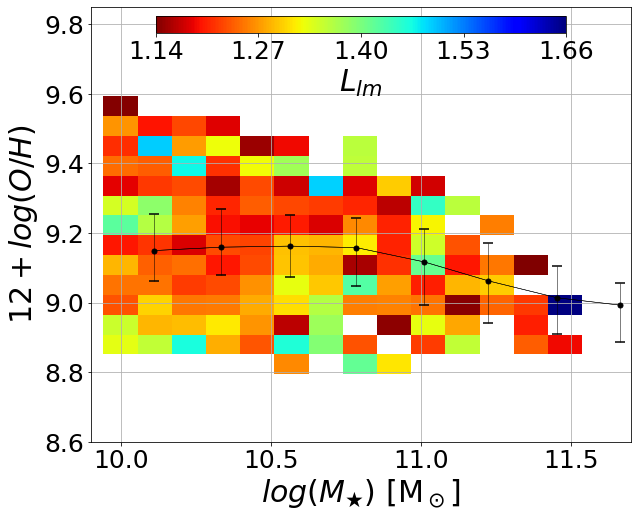

In [39]:
# Plot color map
fig,ax=plt.subplots(figsize=(10,8))

# Intervals of binning, as function of nbinsx and nbinsy:
intx=(max(xplot)-min(xplot))/nbinsx
inty=(max(yplot)-min(yplot))/nbinsy

# If 'var_color' is an empty sequence or 'statistic=='counts'', plot a 2D histogram. 
if (var_color==[]) or (statistic=='counts'):   
    # Min and Max of each variable
    xmin,xmax=min(xplot),max(xplot)
    xlim=[xmin,xmax]

    ymin,ymax=min(yplot),max(yplot)
    ylim=[ymin,ymax]
        
    # Construct the 2D histogram
    hist2d,xedges,yedges,im=ax.hist2d(xplot, yplot, bins=(nbinsx,nbinsy),cmap=cmap,
                                      range=(xlim,ylim),cmin=cmin)
    var_label='N'
        
# If not want to plot a 2D histogram, construct the color map
else:
            #Define a "density" array of 2x2 used for binning. Its elements will be the values of the statistic
            density=np.zeros((nbinsy+1,nbinsx+1))    # NOTE THE TRANSPOSITION OF AXIS! It is done like this in
                                                     # order to use 'meshgrid' later.

            # Calculate the desired statistic in each bin
            auxx=min(xplot)
            for i in range(nbinsx+1):
                auxy=min(yplot)
                for j in range(nbinsy+1):
                    # Select data of elements that belong to the bin
                    var=var_color[(xplot >= auxx) & (xplot < auxx+intx) & (yplot >= auxy) & (yplot < auxy+inty)]
                    # Calculate the statistic in the bin, if there are at least cmin elements inside the bin.
                    if (var.size >=cmin):
                        if statistic=='mean':
                            stat_val=np.mean(var)
                        elif statistic=='median':
                            stat_val=np.median(var)                        
                    # If not enough elements in the bin, assign the value -1e99 to the statistic        
                    else:
                        stat_val=-1e99
                
                    # Overwrite the [j,i] element (bin) of density array with the calculated statistic
                    density[j,i]=stat_val
                    auxy=auxy+inty
                auxx=auxx+intx

            # Define x-coordinates of 2D grid
            x=np.zeros(nbinsx+1)
            auxx=min(xplot)
            for i in range(nbinsx+1):
                x[i]=auxx
                auxx=auxx+intx
            
            # Define y-coordinates of 2D grid
            y=np.zeros(nbinsy+1)
            auxy=min(yplot)
            for j in range(nbinsy+1):
                y[j]=auxy
                auxy=auxy+inty

            # Construct two 2D array with grid coordinates
            x,y=np.meshgrid(x,y)

            # Define again the density (statistic) array
            z=density
        
            # IMPORTANT!!: x, y, z MUST have the same shape.

            # Search min and max of statistic, considering only bins with "well-defined" statistic
            densitylim=density[density > -1e99]
            vmin=np.amin(densitylim)
            vmax=np.amax(densitylim)

            # Prepare the color map
            cmap = plt.get_cmap(cmap)       # Name of the color map
            cmap.set_under('white')                      # "bad-defined" bins will be of colour white. 
            norm = colors.Normalize(vmin=vmin, vmax=vmax, clip=False)    # Normalize colors to the interval (vmin,vmax)

            # Construct color grid
            im=ax.pcolormesh(x,y,z,cmap=cmap,norm=norm,shading='auto')                     

# Barra de referencia y "tuneo" del gráfico
# Add an axis that will contain the color bar 
cbaxes=ax.inset_axes([0.12,0.94,0.76,0.04]) 

# Construct color bar using the color grid (object 'im')
cbar=plt.colorbar(im,cax=cbaxes,orientation='horizontal')   
cbar.set_label(var_label,fontsize=30)    # Label of color bar
cbaxes.tick_params(axis='both', which='major', labelsize=25)   # Size of ticks labels

# Number of ticks in color bar
loc = ticker.LinearLocator(numticks=5)   # For simplicity, use always linear-separated ticks in the color bar
cbar.locator=loc
cbar.update_ticks()
if (var_color==[]) or (statistic=='counts'):   # Format the string of color bar ticks label
    cbaxes.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))
else:
    cbaxes.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))
    
# Ajustar cosas del gráfico
ax.set_xlabel(xlabel,fontsize=30)
ax.set_ylabel(ylabel,fontsize=30)

# xmin,xmax=min(xplot)-0.3,max(xplot)+0.2
xmin,xmax = 9.9,11.7
ax.set_xlim(xmin,xmax)

# ymin,ymax=min(yplot)+0.2,max(yplot)+0.5
ymin,ymax= 8.6,9.85
ax.set_ylim(ymin,ymax)

ax.tick_params(axis='both',labelsize=25)

# Ploteamos las medianas de las galaxias en el plano MZR
ax.plot(xmedian,ymedian,c='k',marker='o',ms=5,linestyle='-',linewidth=0.5,label='Median relation')
ax.errorbar(xmedian,ymedian,yerr=yerror,c='k',marker='o',markersize=2,linestyle='-',linewidth=0.5,label='Median relation',capsize=5,capthick=1.5)

# Ploteamos las medianas de las galaxias que sufrieron un mergers, desde z=3.2
# ax.plot(xmedian_lmicro,ymedian_lmicro,c='b',marker='o',ms=2,linestyle='--',linewidth=0.5,label='Median relation of galaxis of last mergers')
# ax.errorbar(xmedian_lmicro,ymedian_lmicro,yerr=yerror_lmicro,c='k',marker='o',markersize=2,linestyle='--',linewidth=0.5,label='Median relation',capsize=5,capthick=1.5)

# Ploteamos las medianas de las galaxias que no sufrieron un mergers, desde z=3.2
# ax.plot(xmedian_non,ymedian_non,c='r',marker='o',ms=5,linestyle='--',linewidth=0.5,label='Median relation of galaxis of last mergers')
# ax.errorbar(xmedian_non,ymedian_non,yerr=yerror_non,c='r',marker='o',markersize=2,linestyle='--',linewidth=0.5,label='Median relation',capsize=5,capthick=1.5)

plt.grid(True)
plt.subplots_adjust(left=0.15)

# Guardar la figura, si es necesario
# plt.savefig(path_lin_fig+'Mstar_matalicidad_Llm_RefL0100N1504_snap28.pdf')
    
plt.show()

# Mirando sólo las galaxias que sufrieron desde un minor merger

In [103]:
# Medianas para micro mergers

mask = (DF_MINOR['sf_metalicity'].notna())
xvar_lminor = np.log10(DF_MINOR['Stars_Mass'])[mask].to_numpy()
yvar_lminor = DF_MINOR['sf_metalicity'][mask].to_numpy()

nbins=10        # Numero de bins en variable x a usar para dividir la muestra
perc_low=25.        # Percentil a usar como cota inferior de error
perc_high=75.       # Percentil a usar como cota superior de error
min_count=10         # Mínima cantidad de elementos para considerar en un bin

xmedian_lminor,ymedian_lminor,xerror_lminor,yerror_lminor,elements=Curves2D.median_curve(xvar_lminor,yvar_lminor,bins=nbins,min_count=min_count,perc_low=perc_low,perc_high=perc_high)

## t_lmminor:

In [104]:
astro_merge = Table(data=np.array(DF_MINOR),names=DF_MINOR.keys())

# Condiciones para seleccionar muestra
mask=(astro_merge['L_Last_Minor_Merger']<5)&(astro_merge['Redshift_Minor']<3.5)

data={}
for key in astro_merge.keys():
    data[key]=astro_merge[key][mask]

# Parámetro que colorea
parametro= 'tiempo'

# Variables (ejes) a graficar
xplot = np.log10(data['Stars_Mass'])
yplot = data['sf_metalicity']

xlabel= r'$log(M_\bigstar)~[\rm{M}_\odot]$'
ylabel= r'$12+log(O/H)$'

In [105]:
#-------------------- Variables para pintar grilla 2D-----------------------------------------------
# Variable a usar para colorear
var_color=data[parametro]

# Estadístico a usar ('counts','mean','median')
statistic='median'

# 'counts' es para contar el número de galaxias en cada bin (digamos, es para hacer un histograma2D)
# 'mean' y 'median' son para calcular la media o la mediana de var en cada bin.
           
# Label to use in color bar reference
var_label=r'$t_{lminor}~[Gyr]$'

# Número de bines en cada eje
nbinsx=20
nbinsy=30
    
# Minimum number of galaxies to color bin (bins with less galaxies than this value will
# not be taken into account)
cmin=4

# Color map to use. Use 'mapname_r' to invert colours. For example, if want to
# invert the color map "jet", use "jet_r".
cmap='jet_r'

<ipython-input-106-71072ea16f0d>:79: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet_r"))
  cmap.set_under('white')                      # "bad-defined" bins will be of colour white.


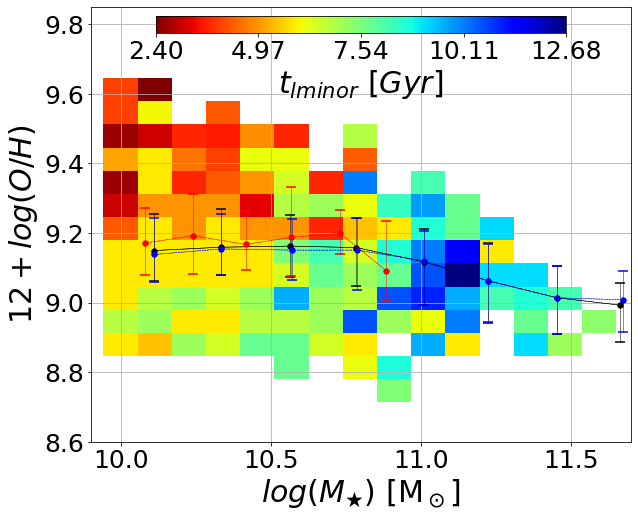

In [106]:
# Plot color map
fig,ax=plt.subplots(figsize=(10,8))

# Intervals of binning, as function of nbinsx and nbinsy:
intx=(max(xplot)-min(xplot))/nbinsx
inty=(max(yplot)-min(yplot))/nbinsy

# If 'var_color' is an empty sequence or 'statistic=='counts'', plot a 2D histogram. 
if (var_color==[]) or (statistic=='counts'):   
    # Min and Max of each variable
    xmin,xmax=min(xplot),max(xplot)
    xlim=[xmin,xmax]

    ymin,ymax=min(yplot),max(yplot)
    ylim=[ymin,ymax]
        
    # Construct the 2D histogram
    hist2d,xedges,yedges,im=ax.hist2d(xplot, yplot, bins=(nbinsx,nbinsy),cmap=cmap,
                                      range=(xlim,ylim),cmin=cmin)
    var_label='N'
        
# If not want to plot a 2D histogram, construct the color map
else:
            #Define a "density" array of 2x2 used for binning. Its elements will be the values of the statistic
            density=np.zeros((nbinsy+1,nbinsx+1))    # NOTE THE TRANSPOSITION OF AXIS! It is done like this in
                                                     # order to use 'meshgrid' later.

            # Calculate the desired statistic in each bin
            auxx=min(xplot)
            for i in range(nbinsx+1):
                auxy=min(yplot)
                for j in range(nbinsy+1):
                    # Select data of elements that belong to the bin
                    var=var_color[(xplot >= auxx) & (xplot < auxx+intx) & (yplot >= auxy) & (yplot < auxy+inty)]
                    # Calculate the statistic in the bin, if there are at least cmin elements inside the bin.
                    if (var.size >=cmin):
                        if statistic=='mean':
                            stat_val=np.mean(var)
                        elif statistic=='median':
                            stat_val=np.median(var)                        
                    # If not enough elements in the bin, assign the value -1e99 to the statistic        
                    else:
                        stat_val=-1e99
                
                    # Overwrite the [j,i] element (bin) of density array with the calculated statistic
                    density[j,i]=stat_val
                    auxy=auxy+inty
                auxx=auxx+intx

            # Define x-coordinates of 2D grid
            x=np.zeros(nbinsx+1)
            auxx=min(xplot)
            for i in range(nbinsx+1):
                x[i]=auxx
                auxx=auxx+intx
            
            # Define y-coordinates of 2D grid
            y=np.zeros(nbinsy+1)
            auxy=min(yplot)
            for j in range(nbinsy+1):
                y[j]=auxy
                auxy=auxy+inty

            # Construct two 2D array with grid coordinates
            x,y=np.meshgrid(x,y)

            # Define again the density (statistic) array
            z=density
        
            # IMPORTANT!!: x, y, z MUST have the same shape.

            # Search min and max of statistic, considering only bins with "well-defined" statistic
            densitylim=density[density > -1e99]
            vmin=np.amin(densitylim)
            vmax=np.amax(densitylim)

            # Prepare the color map
            cmap = plt.get_cmap(cmap)       # Name of the color map
            cmap.set_under('white')                      # "bad-defined" bins will be of colour white. 
            norm = colors.Normalize(vmin=vmin, vmax=vmax, clip=False)    # Normalize colors to the interval (vmin,vmax)

            # Construct color grid
            im=ax.pcolormesh(x,y,z,cmap=cmap,norm=norm,shading='auto')                     

# Barra de referencia y "tuneo" del gráfico
# Add an axis that will contain the color bar 
cbaxes=ax.inset_axes([0.12,0.94,0.76,0.04]) 

# Construct color bar using the color grid (object 'im')
cbar=plt.colorbar(im,cax=cbaxes,orientation='horizontal')   
cbar.set_label(var_label,fontsize=30)    # Label of color bar
cbaxes.tick_params(axis='both', which='major', labelsize=25)   # Size of ticks labels

# Number of ticks in color bar
loc = ticker.LinearLocator(numticks=5)   # For simplicity, use always linear-separated ticks in the color bar
cbar.locator=loc
cbar.update_ticks()
if (var_color==[]) or (statistic=='counts'):   # Format the string of color bar ticks label
    cbaxes.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))
else:
    cbaxes.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))
    
# Ajustar cosas del gráfico
ax.set_xlabel(xlabel,fontsize=30)
ax.set_ylabel(ylabel,fontsize=30)

# xmin,xmax=min(xplot)-0.3,max(xplot)+0.2
xmin,xmax = 9.9,11.7
ax.set_xlim(xmin,xmax)

# ymin,ymax=min(yplot)+0.2,max(yplot)+0.5
ymin,ymax= 8.6,9.85
ax.set_ylim(ymin,ymax)

ax.tick_params(axis='both',labelsize=25)

# Ploteamos las medianas de las galaxias en el plano MZR
ax.plot(xmedian,ymedian,c='k',marker='o',ms=5,linestyle='-',linewidth=0.5,label='Median relation')
ax.errorbar(xmedian,ymedian,yerr=yerror,c='k',marker='o',markersize=5,linestyle='-',linewidth=0.5,label='Median relation',capsize=5,capthick=1.5)

# Ploteamos las medianas de las galaxias que sufrieron un mergers, desde z=3.2
ax.plot(xmedian_lminor,ymedian_lminor,c='b',marker='o',ms=5,linestyle='--',linewidth=0.5,label='Median relation of galaxis of last mergers')
ax.errorbar(xmedian_lminor,ymedian_lminor,yerr=yerror_lminor,c='b',marker='o',markersize=5,linestyle='--',linewidth=0.5,label='Median relation',capsize=5,capthick=1.5)

# Ploteamos las medianas de las galaxias que no sufrieron un mergers, desde z=3.2
ax.plot(xmedian_non,ymedian_non,c='r',marker='o',ms=5,linestyle='--',linewidth=0.5,label='Median relation of galaxis of last mergers')
ax.errorbar(xmedian_non,ymedian_non,yerr=yerror_non,c='r',marker='o',markersize=5,linestyle='--',linewidth=0.5,label='Median relation',capsize=5,capthick=1.5)


plt.grid(True)
plt.subplots_adjust(left=0.15)

# Guardar la figura, si es necesario
# plt.savefig(path_lin_fig+'Mstar_matalicidad_tlmm_RefL0100N1504_snap28.pdf')
    
plt.show()

## Z_lmminor:

In [108]:
astro_merge = Table(data=np.array(DF_MINOR),names=DF_MINOR.keys())

# Condiciones para seleccionar muestra
mask=(astro_merge['L_Last_Minor_Merger']<5)&(astro_merge['Redshift_Minor']<3.5)

data={}
for key in astro_merge.keys():
    data[key]=astro_merge[key][mask]

# Parámetro que colorea
parametro= 'Redshift_Minor'

# Variables (ejes) a graficar
xplot = np.log10(data['Stars_Mass'])
yplot = data['sf_metalicity']

xlabel= r'$log(M_\bigstar)~[\rm{M}_\odot]$'
ylabel= r'$12+log(O/H)$'

In [109]:
#-------------------- Variables para pintar grilla 2D-----------------------------------------------
# Variable a usar para colorear
var_color=data[parametro]

# Estadístico a usar ('counts','mean','median')
statistic='median'

# 'counts' es para contar el número de galaxias en cada bin (digamos, es para hacer un histograma2D)
# 'mean' y 'median' son para calcular la media o la mediana de var en cada bin.
           
# Label to use in color bar reference
var_label=r'$z_{lminor}$'

# Número de bines en cada eje
nbinsx=20
nbinsy=30
    
# Minimum number of galaxies to color bin (bins with less galaxies than this value will
# not be taken into account)
cmin=4

# Color map to use. Use 'mapname_r' to invert colours. For example, if want to
# invert the color map "jet", use "jet_r".
cmap='jet_r'

<ipython-input-110-744f8cdba94a>:79: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet_r"))
  cmap.set_under('white')                      # "bad-defined" bins will be of colour white.


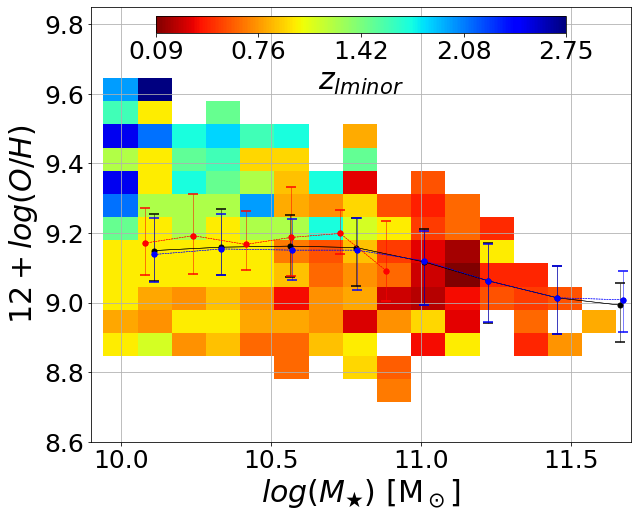

In [110]:
# Plot color map
fig,ax=plt.subplots(figsize=(10,8))

# Intervals of binning, as function of nbinsx and nbinsy:
intx=(max(xplot)-min(xplot))/nbinsx
inty=(max(yplot)-min(yplot))/nbinsy

# If 'var_color' is an empty sequence or 'statistic=='counts'', plot a 2D histogram. 
if (var_color==[]) or (statistic=='counts'):   
    # Min and Max of each variable
    xmin,xmax=min(xplot),max(xplot)
    xlim=[xmin,xmax]

    ymin,ymax=min(yplot),max(yplot)
    ylim=[ymin,ymax]
        
    # Construct the 2D histogram
    hist2d,xedges,yedges,im=ax.hist2d(xplot, yplot, bins=(nbinsx,nbinsy),cmap=cmap,
                                      range=(xlim,ylim),cmin=cmin)
    var_label='N'
        
# If not want to plot a 2D histogram, construct the color map
else:
            #Define a "density" array of 2x2 used for binning. Its elements will be the values of the statistic
            density=np.zeros((nbinsy+1,nbinsx+1))    # NOTE THE TRANSPOSITION OF AXIS! It is done like this in
                                                     # order to use 'meshgrid' later.

            # Calculate the desired statistic in each bin
            auxx=min(xplot)
            for i in range(nbinsx+1):
                auxy=min(yplot)
                for j in range(nbinsy+1):
                    # Select data of elements that belong to the bin
                    var=var_color[(xplot >= auxx) & (xplot < auxx+intx) & (yplot >= auxy) & (yplot < auxy+inty)]
                    # Calculate the statistic in the bin, if there are at least cmin elements inside the bin.
                    if (var.size >=cmin):
                        if statistic=='mean':
                            stat_val=np.mean(var)
                        elif statistic=='median':
                            stat_val=np.median(var)                        
                    # If not enough elements in the bin, assign the value -1e99 to the statistic        
                    else:
                        stat_val=-1e99
                
                    # Overwrite the [j,i] element (bin) of density array with the calculated statistic
                    density[j,i]=stat_val
                    auxy=auxy+inty
                auxx=auxx+intx

            # Define x-coordinates of 2D grid
            x=np.zeros(nbinsx+1)
            auxx=min(xplot)
            for i in range(nbinsx+1):
                x[i]=auxx
                auxx=auxx+intx
            
            # Define y-coordinates of 2D grid
            y=np.zeros(nbinsy+1)
            auxy=min(yplot)
            for j in range(nbinsy+1):
                y[j]=auxy
                auxy=auxy+inty

            # Construct two 2D array with grid coordinates
            x,y=np.meshgrid(x,y)

            # Define again the density (statistic) array
            z=density
        
            # IMPORTANT!!: x, y, z MUST have the same shape.

            # Search min and max of statistic, considering only bins with "well-defined" statistic
            densitylim=density[density > -1e99]
            vmin=np.amin(densitylim)
            vmax=np.amax(densitylim)

            # Prepare the color map
            cmap = plt.get_cmap(cmap)       # Name of the color map
            cmap.set_under('white')                      # "bad-defined" bins will be of colour white. 
            norm = colors.Normalize(vmin=vmin, vmax=vmax, clip=False)    # Normalize colors to the interval (vmin,vmax)

            # Construct color grid
            im=ax.pcolormesh(x,y,z,cmap=cmap,norm=norm,shading='auto')                     

# Barra de referencia y "tuneo" del gráfico
# Add an axis that will contain the color bar 
cbaxes=ax.inset_axes([0.12,0.94,0.76,0.04]) 

# Construct color bar using the color grid (object 'im')
cbar=plt.colorbar(im,cax=cbaxes,orientation='horizontal')   
cbar.set_label(var_label,fontsize=30)    # Label of color bar
cbaxes.tick_params(axis='both', which='major', labelsize=25)   # Size of ticks labels

# Number of ticks in color bar
loc = ticker.LinearLocator(numticks=5)   # For simplicity, use always linear-separated ticks in the color bar
cbar.locator=loc
cbar.update_ticks()
if (var_color==[]) or (statistic=='counts'):   # Format the string of color bar ticks label
    cbaxes.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))
else:
    cbaxes.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))
    
# Ajustar cosas del gráfico
ax.set_xlabel(xlabel,fontsize=30)
ax.set_ylabel(ylabel,fontsize=30)

# xmin,xmax=min(xplot)-0.3,max(xplot)+0.2
xmin,xmax = 9.9,11.7
ax.set_xlim(xmin,xmax)

# ymin,ymax=min(yplot)+0.2,max(yplot)+0.5
ymin,ymax= 8.6,9.85
ax.set_ylim(ymin,ymax)

ax.tick_params(axis='both',labelsize=25)

# Ploteamos las medianas de las galaxias en el plano MZR
ax.plot(xmedian,ymedian,c='k',marker='o',ms=5,linestyle='-',linewidth=0.5,label='Median relation')
ax.errorbar(xmedian,ymedian,yerr=yerror,c='k',marker='o',markersize=2,linestyle='-',linewidth=0.5,label='Median relation',capsize=5,capthick=1.5)

# Ploteamos las medianas de las galaxias que sufrieron un mergers, desde z=3.2
ax.plot(xmedian_lminor,ymedian_lminor,c='b',marker='o',ms=5,linestyle='--',linewidth=0.5,label='Median relation of galaxis of last mergers')
ax.errorbar(xmedian_lminor,ymedian_lminor,yerr=yerror_lminor,c='b',marker='o',markersize=5,linestyle='--',linewidth=0.5,label='Median relation',capsize=5,capthick=1.5)

# Ploteamos las medianas de las galaxias que no sufrieron un mergers, desde z=3.2
ax.plot(xmedian_non,ymedian_non,c='r',marker='o',ms=5,linestyle='--',linewidth=0.5,label='Median relation of galaxis of last mergers')
ax.errorbar(xmedian_non,ymedian_non,yerr=yerror_non,c='r',marker='o',markersize=5,linestyle='--',linewidth=0.5,label='Median relation',capsize=5,capthick=1.5)

plt.grid(True)
plt.subplots_adjust(left=0.15)

# Guardar la figura, si es necesario
# plt.savefig(path_lin_fig+'Mstar_matalicidad_Zlmm_RefL0100N1504_snap28.pdf')
    
plt.show()

## L_lmminor:

In [40]:
astro_merge = Table(data=np.array(DF_MINOR),names=DF_MINOR.keys())

# Condiciones para seleccionar muestra
mask=(astro_merge['L_Last_Minor_Merger']<5)&(astro_merge['Redshift_Minor']<3.5)

data={}
for key in astro_merge.keys():
    data[key]=astro_merge[key][mask]

# Parámetro que colorea
parametro= 'L_Last_Minor_Merger'

# Variables (ejes) a graficar
xplot = np.log10(data['Stars_Mass'])
yplot = data['sf_metalicity']

xlabel= r'$log(M_\bigstar)~[\rm{M}_\odot]$'
ylabel= r'$12+log(O/H)$'

In [46]:
#-------------------- Variables para pintar grilla 2D-----------------------------------------------
# Variable a usar para colorear
var_color=data[parametro]

# Estadístico a usar ('counts','mean','median')
statistic='median'

# 'counts' es para contar el número de galaxias en cada bin (digamos, es para hacer un histograma2D)
# 'mean' y 'median' son para calcular la media o la mediana de var en cada bin.
           
# Label to use in color bar reference
var_label=r'$L_{lminor}$'

# Número de bines en cada eje
nbinsx=20
nbinsy=40
    
# Minimum number of galaxies to color bin (bins with less galaxies than this value will
# not be taken into account)
cmin=4

# Color map to use. Use 'mapname_r' to invert colours. For example, if want to
# invert the color map "jet", use "jet_r".
cmap='jet_r'

<ipython-input-47-64753ffdce98>:79: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet_r"))
  cmap.set_under('white')                      # "bad-defined" bins will be of colour white.


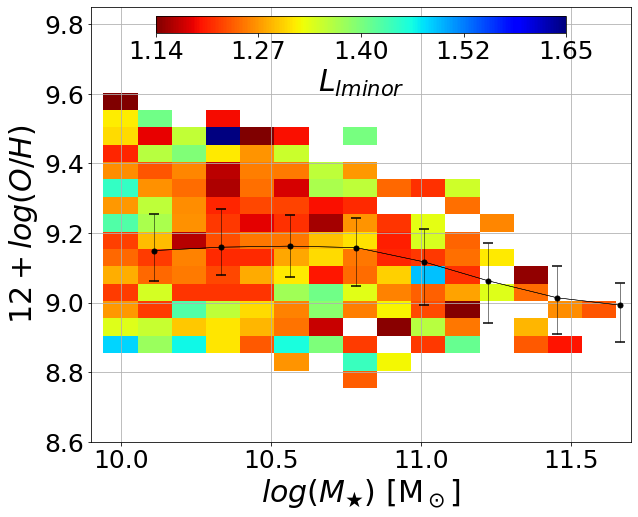

In [47]:
# Plot color map
fig,ax=plt.subplots(figsize=(10,8))

# Intervals of binning, as function of nbinsx and nbinsy:
intx=(max(xplot)-min(xplot))/nbinsx
inty=(max(yplot)-min(yplot))/nbinsy

# If 'var_color' is an empty sequence or 'statistic=='counts'', plot a 2D histogram. 
if (var_color==[]) or (statistic=='counts'):   
    # Min and Max of each variable
    xmin,xmax=min(xplot),max(xplot)
    xlim=[xmin,xmax]

    ymin,ymax=min(yplot),max(yplot)
    ylim=[ymin,ymax]
        
    # Construct the 2D histogram
    hist2d,xedges,yedges,im=ax.hist2d(xplot, yplot, bins=(nbinsx,nbinsy),cmap=cmap,
                                      range=(xlim,ylim),cmin=cmin)
    var_label='N'
        
# If not want to plot a 2D histogram, construct the color map
else:
            #Define a "density" array of 2x2 used for binning. Its elements will be the values of the statistic
            density=np.zeros((nbinsy+1,nbinsx+1))    # NOTE THE TRANSPOSITION OF AXIS! It is done like this in
                                                     # order to use 'meshgrid' later.

            # Calculate the desired statistic in each bin
            auxx=min(xplot)
            for i in range(nbinsx+1):
                auxy=min(yplot)
                for j in range(nbinsy+1):
                    # Select data of elements that belong to the bin
                    var=var_color[(xplot >= auxx) & (xplot < auxx+intx) & (yplot >= auxy) & (yplot < auxy+inty)]
                    # Calculate the statistic in the bin, if there are at least cmin elements inside the bin.
                    if (var.size >=cmin):
                        if statistic=='mean':
                            stat_val=np.mean(var)
                        elif statistic=='median':
                            stat_val=np.median(var)                        
                    # If not enough elements in the bin, assign the value -1e99 to the statistic        
                    else:
                        stat_val=-1e99
                
                    # Overwrite the [j,i] element (bin) of density array with the calculated statistic
                    density[j,i]=stat_val
                    auxy=auxy+inty
                auxx=auxx+intx

            # Define x-coordinates of 2D grid
            x=np.zeros(nbinsx+1)
            auxx=min(xplot)
            for i in range(nbinsx+1):
                x[i]=auxx
                auxx=auxx+intx
            
            # Define y-coordinates of 2D grid
            y=np.zeros(nbinsy+1)
            auxy=min(yplot)
            for j in range(nbinsy+1):
                y[j]=auxy
                auxy=auxy+inty

            # Construct two 2D array with grid coordinates
            x,y=np.meshgrid(x,y)

            # Define again the density (statistic) array
            z=density
        
            # IMPORTANT!!: x, y, z MUST have the same shape.

            # Search min and max of statistic, considering only bins with "well-defined" statistic
            densitylim=density[density > -1e99]
            vmin=np.amin(densitylim)
            vmax=np.amax(densitylim)

            # Prepare the color map
            cmap = plt.get_cmap(cmap)       # Name of the color map
            cmap.set_under('white')                      # "bad-defined" bins will be of colour white. 
            norm = colors.Normalize(vmin=vmin, vmax=vmax, clip=False)    # Normalize colors to the interval (vmin,vmax)

            # Construct color grid
            im=ax.pcolormesh(x,y,z,cmap=cmap,norm=norm,shading='auto')                     

# Barra de referencia y "tuneo" del gráfico
# Add an axis that will contain the color bar 
cbaxes=ax.inset_axes([0.12,0.94,0.76,0.04]) 

# Construct color bar using the color grid (object 'im')
cbar=plt.colorbar(im,cax=cbaxes,orientation='horizontal')   
cbar.set_label(var_label,fontsize=30)    # Label of color bar
cbaxes.tick_params(axis='both', which='major', labelsize=25)   # Size of ticks labels

# Number of ticks in color bar
loc = ticker.LinearLocator(numticks=5)   # For simplicity, use always linear-separated ticks in the color bar
cbar.locator=loc
cbar.update_ticks()
if (var_color==[]) or (statistic=='counts'):   # Format the string of color bar ticks label
    cbaxes.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))
else:
    cbaxes.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))
    
# Ajustar cosas del gráfico
ax.set_xlabel(xlabel,fontsize=30)
ax.set_ylabel(ylabel,fontsize=30)

# xmin,xmax=min(xplot)-0.3,max(xplot)+0.2
xmin,xmax = 9.9,11.7
ax.set_xlim(xmin,xmax)

# ymin,ymax=min(yplot)+0.2,max(yplot)+0.5
ymin,ymax= 8.6,9.85
ax.set_ylim(ymin,ymax)

ax.tick_params(axis='both',labelsize=25)

# Ploteamos las medianas de las galaxias en el plano MZR
ax.plot(xmedian,ymedian,c='k',marker='o',ms=5,linestyle='-',linewidth=0.5,label='Median relation')
ax.errorbar(xmedian,ymedian,yerr=yerror,c='k',marker='o',markersize=2,linestyle='-',linewidth=0.5,label='Median relation',capsize=5,capthick=1.5)

# Ploteamos las medianas de las galaxias que sufrieron un mergers, desde z=3.2
# ax.plot(xmedian_lminor,ymedian_lminor,c='b',marker='o',ms=5,linestyle='--',linewidth=0.5,label='Median relation of galaxis of last mergers')
# ax.errorbar(xmedian_lminor,ymedian_lminor,yerr=yerror_lminor,c='k',marker='o',markersize=2,linestyle='--',linewidth=0.5,label='Median relation',capsize=5,capthick=1.5)

# Ploteamos las medianas de las galaxias que no sufrieron un mergers, desde z=3.2
# ax.plot(xmedian_non,ymedian_non,c='r',marker='o',ms=5,linestyle='--',linewidth=0.5,label='Median relation of galaxis of last mergers')
# ax.errorbar(xmedian_non,ymedian_non,yerr=yerror_non,c='r',marker='o',markersize=5,linestyle='--',linewidth=0.5,label='Median relation',capsize=5,capthick=1.5)

plt.grid(True)
plt.subplots_adjust(left=0.15)


# Guardar la figura, si es necesario
# plt.savefig(path_lin_fig+'Mstar_matalicidad_Llmm_RefL0100N1504_snap28.pdf')
    
plt.show()

# Mísmos gráficos pero sólo mirando los últimos major merger

In [114]:
mask = (DF_MM['sf_metalicity'].notna())
xvar_lmajor = np.log10(DF_MM['Stars_Mass'])[mask].to_numpy()
yvar_lmajor = DF_MM['sf_metalicity'][mask].to_numpy()

nbins=10        # Numero de bins en variable x a usar para dividir la muestra
perc_low=25.        # Percentil a usar como cota inferior de error
perc_high=75.       # Percentil a usar como cota superior de error
min_count=10         # Mínima cantidad de elementos para considerar en un bin

xmedian_lmajor,ymedian_lmajor,xerror_lmajor,yerror_lmajor,elements=Curves2D.median_curve(xvar_lmajor,yvar_lmajor,bins=nbins,min_count=min_count,perc_low=perc_low,perc_high=perc_high)

## t_lmm:

In [115]:
astro_merge = Table(data=np.array(DF_MM),names=DF_MM.keys())

# Condiciones para seleccionar muestra
mask=(astro_merge['L_Last_Major_Merger']<5)&(astro_merge['Redshift_y']<3.5)

data={}
for key in astro_merge.keys():
    data[key]=astro_merge[key][mask]

# Parámetro que colorea
parametro= 'tiempo'

# Variables (ejes) a graficar
xplot = np.log10(data['Stars_Mass'])
yplot = data['sf_metalicity']

xlabel= r'$log(M_\bigstar)~[\rm{M}_\odot]$'
ylabel= r'$12+log(O/H)$'

In [116]:
#-------------------- Variables para pintar grilla 2D-----------------------------------------------
# Variable a usar para colorear
var_color=data[parametro]

# Estadístico a usar ('counts','mean','median')
statistic='median'

# 'counts' es para contar el número de galaxias en cada bin (digamos, es para hacer un histograma2D)
# 'mean' y 'median' son para calcular la media o la mediana de var en cada bin.
           
# Label to use in color bar reference
var_label=r'$t_{lmm}~[Gyr]$'

# Número de bines en cada eje
nbinsx=15
nbinsy=20
    
# Minimum number of galaxies to color bin (bins with less galaxies than this value will
# not be taken into account)
cmin=4

# Color map to use. Use 'mapname_r' to invert colours. For example, if want to
# invert the color map "jet", use "jet_r".
cmap='jet_r'

<ipython-input-117-d0a03b71c1b9>:79: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet_r"))
  cmap.set_under('white')                      # "bad-defined" bins will be of colour white.


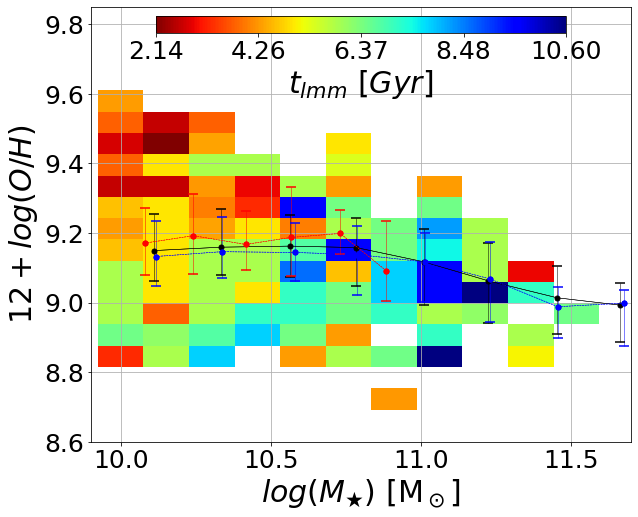

In [117]:
# Plot color map
fig,ax=plt.subplots(figsize=(10,8))

# Intervals of binning, as function of nbinsx and nbinsy:
intx=(max(xplot)-min(xplot))/nbinsx
inty=(max(yplot)-min(yplot))/nbinsy

# If 'var_color' is an empty sequence or 'statistic=='counts'', plot a 2D histogram. 
if (var_color==[]) or (statistic=='counts'):   
    # Min and Max of each variable
    xmin,xmax=min(xplot),max(xplot)
    xlim=[xmin,xmax]

    ymin,ymax=min(yplot),max(yplot)
    ylim=[ymin,ymax]
        
    # Construct the 2D histogram
    hist2d,xedges,yedges,im=ax.hist2d(xplot, yplot, bins=(nbinsx,nbinsy),cmap=cmap,
                                      range=(xlim,ylim),cmin=cmin)
    var_label='N'
        
# If not want to plot a 2D histogram, construct the color map
else:
            #Define a "density" array of 2x2 used for binning. Its elements will be the values of the statistic
            density=np.zeros((nbinsy+1,nbinsx+1))    # NOTE THE TRANSPOSITION OF AXIS! It is done like this in
                                                     # order to use 'meshgrid' later.

            # Calculate the desired statistic in each bin
            auxx=min(xplot)
            for i in range(nbinsx+1):
                auxy=min(yplot)
                for j in range(nbinsy+1):
                    # Select data of elements that belong to the bin
                    var=var_color[(xplot >= auxx) & (xplot < auxx+intx) & (yplot >= auxy) & (yplot < auxy+inty)]
                    # Calculate the statistic in the bin, if there are at least cmin elements inside the bin.
                    if (var.size >=cmin):
                        if statistic=='mean':
                            stat_val=np.mean(var)
                        elif statistic=='median':
                            stat_val=np.median(var)                        
                    # If not enough elements in the bin, assign the value -1e99 to the statistic        
                    else:
                        stat_val=-1e99
                
                    # Overwrite the [j,i] element (bin) of density array with the calculated statistic
                    density[j,i]=stat_val
                    auxy=auxy+inty
                auxx=auxx+intx

            # Define x-coordinates of 2D grid
            x=np.zeros(nbinsx+1)
            auxx=min(xplot)
            for i in range(nbinsx+1):
                x[i]=auxx
                auxx=auxx+intx
            
            # Define y-coordinates of 2D grid
            y=np.zeros(nbinsy+1)
            auxy=min(yplot)
            for j in range(nbinsy+1):
                y[j]=auxy
                auxy=auxy+inty

            # Construct two 2D array with grid coordinates
            x,y=np.meshgrid(x,y)

            # Define again the density (statistic) array
            z=density
        
            # IMPORTANT!!: x, y, z MUST have the same shape.

            # Search min and max of statistic, considering only bins with "well-defined" statistic
            densitylim=density[density > -1e99]
            vmin=np.amin(densitylim)
            vmax=np.amax(densitylim)

            # Prepare the color map
            cmap = plt.get_cmap(cmap)       # Name of the color map
            cmap.set_under('white')                      # "bad-defined" bins will be of colour white. 
            norm = colors.Normalize(vmin=vmin, vmax=vmax, clip=False)    # Normalize colors to the interval (vmin,vmax)

            # Construct color grid
            im=ax.pcolormesh(x,y,z,cmap=cmap,norm=norm,shading='auto')                     

# Barra de referencia y "tuneo" del gráfico
# Add an axis that will contain the color bar 
cbaxes=ax.inset_axes([0.12,0.94,0.76,0.04]) 

# Construct color bar using the color grid (object 'im')
cbar=plt.colorbar(im,cax=cbaxes,orientation='horizontal')   
cbar.set_label(var_label,fontsize=30)    # Label of color bar
cbaxes.tick_params(axis='both', which='major', labelsize=25)   # Size of ticks labels

# Number of ticks in color bar
loc = ticker.LinearLocator(numticks=5)   # For simplicity, use always linear-separated ticks in the color bar
cbar.locator=loc
cbar.update_ticks()
if (var_color==[]) or (statistic=='counts'):   # Format the string of color bar ticks label
    cbaxes.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))
else:
    cbaxes.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))
    
# Ajustar cosas del gráfico
ax.set_xlabel(xlabel,fontsize=30)
ax.set_ylabel(ylabel,fontsize=30)

# xmin,xmax=min(xplot)-0.3,max(xplot)+0.2
xmin,xmax = 9.9,11.7
ax.set_xlim(xmin,xmax)

# ymin,ymax=min(yplot)+0.2,max(yplot)+0.5
ymin,ymax= 8.6,9.85
ax.set_ylim(ymin,ymax)

ax.tick_params(axis='both',labelsize=25)

# Ploteamos las medianas de las galaxias en el plano MZR
ax.plot(xmedian,ymedian,c='k',marker='o',ms=5,linestyle='-',linewidth=0.5,label='Median relation')
ax.errorbar(xmedian,ymedian,yerr=yerror,c='k',marker='o',markersize=2,linestyle='-',linewidth=0.5,label='Median relation',capsize=5,capthick=1.5)

# Ploteamos las medianas de las galaxias que sufrieron un mergers, desde z=3.2
ax.plot(xmedian_lmajor,ymedian_lmajor,c='b',marker='o',ms=5,linestyle='--',linewidth=0.5,label='Median relation of galaxis of last mergers')
ax.errorbar(xmedian_lmajor,ymedian_lmajor,yerr=yerror_lmajor,c='b',marker='o',markersize=5,linestyle='--',linewidth=0.5,label='Median relation',capsize=5,capthick=1.5)

# Ploteamos las medianas de las galaxias que no sufrieron un mergers, desde z=3.2
ax.plot(xmedian_non,ymedian_non,c='r',marker='o',ms=5,linestyle='--',linewidth=0.5,label='Median relation of galaxis of last mergers')
ax.errorbar(xmedian_non,ymedian_non,yerr=yerror_non,c='r',marker='o',markersize=5,linestyle='--',linewidth=0.5,label='Median relation',capsize=5,capthick=1.5)

plt.grid(True)
plt.subplots_adjust(left=0.15)

# Guardar la figura, si es necesario
# plt.savefig(path_lin_fig+'Mstar_matalicidad_tlmm_RefL0100N1504_snap28.pdf')
    
plt.show()

## Z_lmm:

In [119]:
astro_merge = Table(data=np.array(DF_MM),names=DF_MM.keys())

# Condiciones para seleccionar muestra
mask=(astro_merge['L_Last_Major_Merger']<5)&(astro_merge['Redshift_y']<3.5)

data={}
for key in astro_merge.keys():
    data[key]=astro_merge[key][mask]

# Parámetro que colorea
parametro= 'Redshift_y'

# Variables (ejes) a graficar
xplot = np.log10(data['Stars_Mass'])
yplot = data['sf_metalicity']

xlabel= r'$log(M_\bigstar)~[\rm{M}_\odot]$'
ylabel= r'$12+log(O/H)$'

In [120]:
#-------------------- Variables para pintar grilla 2D-----------------------------------------------
# Variable a usar para colorear
var_color=data[parametro]

# Estadístico a usar ('counts','mean','median')
statistic='median'

# 'counts' es para contar el número de galaxias en cada bin (digamos, es para hacer un histograma2D)
# 'mean' y 'median' son para calcular la media o la mediana de var en cada bin.
           
# Label to use in color bar reference
var_label=r'$z_{lmm}$'

# Número de bines en cada eje
nbinsx=15
nbinsy=20
    
# Minimum number of galaxies to color bin (bins with less galaxies than this value will
# not be taken into account)
cmin=4

# Color map to use. Use 'mapname_r' to invert colours. For example, if want to
# invert the color map "jet", use "jet_r".
cmap='jet_r'

<ipython-input-121-fe4c27b7ca1c>:79: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet_r"))
  cmap.set_under('white')                      # "bad-defined" bins will be of colour white.


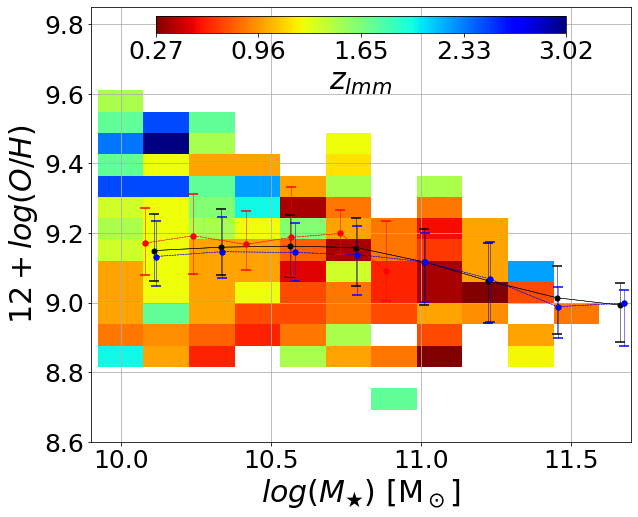

In [121]:
# Plot color map
fig,ax=plt.subplots(figsize=(10,8))

# Intervals of binning, as function of nbinsx and nbinsy:
intx=(max(xplot)-min(xplot))/nbinsx
inty=(max(yplot)-min(yplot))/nbinsy

# If 'var_color' is an empty sequence or 'statistic=='counts'', plot a 2D histogram. 
if (var_color==[]) or (statistic=='counts'):   
    # Min and Max of each variable
    xmin,xmax=min(xplot),max(xplot)
    xlim=[xmin,xmax]

    ymin,ymax=min(yplot),max(yplot)
    ylim=[ymin,ymax]
        
    # Construct the 2D histogram
    hist2d,xedges,yedges,im=ax.hist2d(xplot, yplot, bins=(nbinsx,nbinsy),cmap=cmap,
                                      range=(xlim,ylim),cmin=cmin)
    var_label='N'
        
# If not want to plot a 2D histogram, construct the color map
else:
            #Define a "density" array of 2x2 used for binning. Its elements will be the values of the statistic
            density=np.zeros((nbinsy+1,nbinsx+1))    # NOTE THE TRANSPOSITION OF AXIS! It is done like this in
                                                     # order to use 'meshgrid' later.

            # Calculate the desired statistic in each bin
            auxx=min(xplot)
            for i in range(nbinsx+1):
                auxy=min(yplot)
                for j in range(nbinsy+1):
                    # Select data of elements that belong to the bin
                    var=var_color[(xplot >= auxx) & (xplot < auxx+intx) & (yplot >= auxy) & (yplot < auxy+inty)]
                    # Calculate the statistic in the bin, if there are at least cmin elements inside the bin.
                    if (var.size >=cmin):
                        if statistic=='mean':
                            stat_val=np.mean(var)
                        elif statistic=='median':
                            stat_val=np.median(var)                        
                    # If not enough elements in the bin, assign the value -1e99 to the statistic        
                    else:
                        stat_val=-1e99
                
                    # Overwrite the [j,i] element (bin) of density array with the calculated statistic
                    density[j,i]=stat_val
                    auxy=auxy+inty
                auxx=auxx+intx

            # Define x-coordinates of 2D grid
            x=np.zeros(nbinsx+1)
            auxx=min(xplot)
            for i in range(nbinsx+1):
                x[i]=auxx
                auxx=auxx+intx
            
            # Define y-coordinates of 2D grid
            y=np.zeros(nbinsy+1)
            auxy=min(yplot)
            for j in range(nbinsy+1):
                y[j]=auxy
                auxy=auxy+inty

            # Construct two 2D array with grid coordinates
            x,y=np.meshgrid(x,y)

            # Define again the density (statistic) array
            z=density
        
            # IMPORTANT!!: x, y, z MUST have the same shape.

            # Search min and max of statistic, considering only bins with "well-defined" statistic
            densitylim=density[density > -1e99]
            vmin=np.amin(densitylim)
            vmax=np.amax(densitylim)

            # Prepare the color map
            cmap = plt.get_cmap(cmap)       # Name of the color map
            cmap.set_under('white')                      # "bad-defined" bins will be of colour white. 
            norm = colors.Normalize(vmin=vmin, vmax=vmax, clip=False)    # Normalize colors to the interval (vmin,vmax)

            # Construct color grid
            im=ax.pcolormesh(x,y,z,cmap=cmap,norm=norm,shading='auto')                     

# Barra de referencia y "tuneo" del gráfico
# Add an axis that will contain the color bar 
cbaxes=ax.inset_axes([0.12,0.94,0.76,0.04]) 

# Construct color bar using the color grid (object 'im')
cbar=plt.colorbar(im,cax=cbaxes,orientation='horizontal')   
cbar.set_label(var_label,fontsize=30)    # Label of color bar
cbaxes.tick_params(axis='both', which='major', labelsize=25)   # Size of ticks labels

# Number of ticks in color bar
loc = ticker.LinearLocator(numticks=5)   # For simplicity, use always linear-separated ticks in the color bar
cbar.locator=loc
cbar.update_ticks()
if (var_color==[]) or (statistic=='counts'):   # Format the string of color bar ticks label
    cbaxes.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))
else:
    cbaxes.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))
    
# Ajustar cosas del gráfico
ax.set_xlabel(xlabel,fontsize=30)
ax.set_ylabel(ylabel,fontsize=30)

# xmin,xmax=min(xplot)-0.3,max(xplot)+0.2
xmin,xmax = 9.9,11.7
ax.set_xlim(xmin,xmax)

# ymin,ymax=min(yplot)+0.2,max(yplot)+0.5
ymin,ymax= 8.6,9.85
ax.set_ylim(ymin,ymax)

ax.tick_params(axis='both',labelsize=25)

# Ploteamos las medianas de las galaxias en el plano MZR
ax.plot(xmedian,ymedian,c='k',marker='o',ms=5,linestyle='-',linewidth=0.5,label='Median relation')
ax.errorbar(xmedian,ymedian,yerr=yerror,c='k',marker='o',markersize=2,linestyle='-',linewidth=0.5,label='Median relation',capsize=5,capthick=1.5)

# Ploteamos las medianas de las galaxias que sufrieron un mergers, desde z=3.2
ax.plot(xmedian_lmajor,ymedian_lmajor,c='b',marker='o',ms=5,linestyle='--',linewidth=0.5,label='Median relation of galaxis of last mergers')
ax.errorbar(xmedian_lmajor,ymedian_lmajor,yerr=yerror_lmajor,c='b',marker='o',markersize=5,linestyle='--',linewidth=0.5,label='Median relation',capsize=5,capthick=1.5)

# Ploteamos las medianas de las galaxias que no sufrieron un mergers, desde z=3.2
ax.plot(xmedian_non,ymedian_non,c='r',marker='o',ms=5,linestyle='--',linewidth=0.5,label='Median relation of galaxis of last mergers')
ax.errorbar(xmedian_non,ymedian_non,yerr=yerror_non,c='r',marker='o',markersize=5,linestyle='--',linewidth=0.5,label='Median relation',capsize=5,capthick=1.5)

plt.grid(True)
plt.subplots_adjust(left=0.15)

# Guardar la figura, si es necesario
# plt.savefig(path_lin_fig+'Mstar_matalicidad_Zlmm_RefL0100N1504_snap28.pdf')
    
plt.show()

## L_lmm:

In [46]:
astro_merge = Table(data=np.array(DF_MM),names=DF_MM.keys())

# Condiciones para seleccionar muestra
mask=(astro_merge['L_Last_Major_Merger']<3)&(astro_merge['Redshift_y']<3.5)
data={}
for key in astro_merge.keys():
    data[key]=astro_merge[key][mask]

# Parámetro que colorea
parametro= 'L_Last_Major_Merger'

# Variables (ejes) a graficar
xplot = np.log10(data['Stars_Mass'])
yplot = data['sf_metalicity']

xlabel= r'$log(M_\bigstar)~[\rm{M}_\odot]$'
ylabel= r'$12+log(O/H)$'

In [47]:
#-------------------- Variables para pintar grilla 2D-----------------------------------------------
# Variable a usar para colorear
var_color=data[parametro]

# Estadístico a usar ('counts','mean','median')
statistic='median'

# 'counts' es para contar el número de galaxias en cada bin (digamos, es para hacer un histograma2D)
# 'mean' y 'median' son para calcular la media o la mediana de var en cada bin.
           
# Label to use in color bar reference
var_label=r'$L_{lmm}$'

# Número de bines en cada eje
nbinsx=15
nbinsy=20
    
# Minimum number of galaxies to color bin (bins with less galaxies than this value will
# not be taken into account)
cmin=4

# Color map to use. Use 'mapname_r' to invert colours. For example, if want to
# invert the color map "jet", use "jet_r".
cmap='jet_r'

<ipython-input-48-e5d4c674822b>:79: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet_r"))
  cmap.set_under('white')                      # "bad-defined" bins will be of colour white.


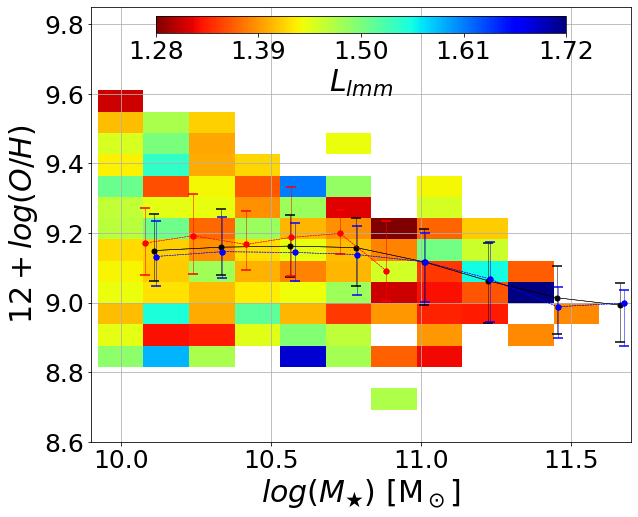

In [48]:
# Plot color map
fig,ax=plt.subplots(figsize=(10,8))

# Intervals of binning, as function of nbinsx and nbinsy:
intx=(max(xplot)-min(xplot))/nbinsx
inty=(max(yplot)-min(yplot))/nbinsy

# If 'var_color' is an empty sequence or 'statistic=='counts'', plot a 2D histogram. 
if (var_color==[]) or (statistic=='counts'):   
    # Min and Max of each variable
    xmin,xmax=min(xplot),max(xplot)
    xlim=[xmin,xmax]

    ymin,ymax=min(yplot),max(yplot)
    ylim=[ymin,ymax]
        
    # Construct the 2D histogram
    hist2d,xedges,yedges,im=ax.hist2d(xplot, yplot, bins=(nbinsx,nbinsy),cmap=cmap,
                                      range=(xlim,ylim),cmin=cmin)
    var_label='N'
        
# If not want to plot a 2D histogram, construct the color map
else:
            #Define a "density" array of 2x2 used for binning. Its elements will be the values of the statistic
            density=np.zeros((nbinsy+1,nbinsx+1))    # NOTE THE TRANSPOSITION OF AXIS! It is done like this in
                                                     # order to use 'meshgrid' later.

            # Calculate the desired statistic in each bin
            auxx=min(xplot)
            for i in range(nbinsx+1):
                auxy=min(yplot)
                for j in range(nbinsy+1):
                    # Select data of elements that belong to the bin
                    var=var_color[(xplot >= auxx) & (xplot < auxx+intx) & (yplot >= auxy) & (yplot < auxy+inty)]
                    # Calculate the statistic in the bin, if there are at least cmin elements inside the bin.
                    if (var.size >=cmin):
                        if statistic=='mean':
                            stat_val=np.mean(var)
                        elif statistic=='median':
                            stat_val=np.median(var)                        
                    # If not enough elements in the bin, assign the value -1e99 to the statistic        
                    else:
                        stat_val=-1e99
                
                    # Overwrite the [j,i] element (bin) of density array with the calculated statistic
                    density[j,i]=stat_val
                    auxy=auxy+inty
                auxx=auxx+intx

            # Define x-coordinates of 2D grid
            x=np.zeros(nbinsx+1)
            auxx=min(xplot)
            for i in range(nbinsx+1):
                x[i]=auxx
                auxx=auxx+intx
            
            # Define y-coordinates of 2D grid
            y=np.zeros(nbinsy+1)
            auxy=min(yplot)
            for j in range(nbinsy+1):
                y[j]=auxy
                auxy=auxy+inty

            # Construct two 2D array with grid coordinates
            x,y=np.meshgrid(x,y)

            # Define again the density (statistic) array
            z=density
        
            # IMPORTANT!!: x, y, z MUST have the same shape.

            # Search min and max of statistic, considering only bins with "well-defined" statistic
            densitylim=density[density > -1e99]
            vmin=np.amin(densitylim)
            vmax=np.amax(densitylim)

            # Prepare the color map
            cmap = plt.get_cmap(cmap)       # Name of the color map
            cmap.set_under('white')                      # "bad-defined" bins will be of colour white. 
            norm = colors.Normalize(vmin=vmin, vmax=vmax, clip=False)    # Normalize colors to the interval (vmin,vmax)

            # Construct color grid
            im=ax.pcolormesh(x,y,z,cmap=cmap,norm=norm,shading='auto')                     

# Barra de referencia y "tuneo" del gráfico
# Add an axis that will contain the color bar 
cbaxes=ax.inset_axes([0.12,0.94,0.76,0.04]) 

# Construct color bar using the color grid (object 'im')
cbar=plt.colorbar(im,cax=cbaxes,orientation='horizontal')   
cbar.set_label(var_label,fontsize=30)    # Label of color bar
cbaxes.tick_params(axis='both', which='major', labelsize=25)   # Size of ticks labels

# Number of ticks in color bar
loc = ticker.LinearLocator(numticks=5)   # For simplicity, use always linear-separated ticks in the color bar
cbar.locator=loc
cbar.update_ticks()
if (var_color==[]) or (statistic=='counts'):   # Format the string of color bar ticks label
    cbaxes.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))
else:
    cbaxes.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))
    
# Ajustar cosas del gráfico
ax.set_xlabel(xlabel,fontsize=30)
ax.set_ylabel(ylabel,fontsize=30)

# xmin,xmax=min(xplot)-0.3,max(xplot)+0.2
xmin,xmax = 9.9,11.7
ax.set_xlim(xmin,xmax)

# ymin,ymax=min(yplot)+0.2,max(yplot)+0.5
ymin,ymax= 8.6,9.85
ax.set_ylim(ymin,ymax)

ax.tick_params(axis='both',labelsize=25)

# Ploteamos las medianas de las galaxias en el plano MZR
ax.plot(xmedian,ymedian,c='k',marker='o',ms=5,linestyle='-',linewidth=0.5,label='Median relation')
ax.errorbar(xmedian,ymedian,yerr=yerror,c='k',marker='o',markersize=2,linestyle='-',linewidth=0.5,label='Median relation',capsize=5,capthick=1.5)

# Ploteamos las medianas de las galaxias que sufrieron un mergers, desde z=3.2
ax.plot(xmedian_lmajor,ymedian_lmajor,c='b',marker='o',ms=5,linestyle='--',linewidth=0.5,label='Median relation of galaxis of last mergers')
ax.errorbar(xmedian_lmajor,ymedian_lmajor,yerr=yerror_lmajor,c='b',marker='o',markersize=5,linestyle='--',linewidth=0.5,label='Median relation',capsize=5,capthick=1.5)

# Ploteamos las medianas de las galaxias que no sufrieron un mergers, desde z=3.2
ax.plot(xmedian_non,ymedian_non,c='r',marker='o',ms=5,linestyle='--',linewidth=0.5,label='Median relation of galaxis of last mergers')
ax.errorbar(xmedian_non,ymedian_non,yerr=yerror_non,c='r',marker='o',markersize=5,linestyle='--',linewidth=0.5,label='Median relation',capsize=5,capthick=1.5)

plt.grid(True)
plt.subplots_adjust(left=0.15)


# Guardar la figura, si es necesario
# plt.savefig(path_lin_fig+'Mstar_matalicidad_Llmm_RefL0100N1504_snap28.pdf')
    
plt.show()

# Calculamos los residuos para los diferentes parámetros

In [49]:
mask = (df['sf_metalicity'].notna())
xvar = np.log10(df['Stars_Mass'])[mask].to_numpy()
yvar = df['sf_metalicity'][mask].to_numpy()

In [50]:
nbins=10        # Numero de bins en variable x a usar para dividir la muestra
perc_low=25.        # Percentil a usar como cota inferior de error
perc_high=75.       # Percentil a usar como cota superior de error
min_count=10         # Mínima cantidad de elementos para considerar en un bin

xmedian,ymedian,xerror,yerror,elements=Curves2D.median_curve(xvar,yvar,bins=nbins,min_count=min_count,
                                                             perc_low=perc_low,perc_high=perc_high)

In [51]:
x      = np.append(10,xmedian)
y      = np.append(ymedian[0],ymedian)

f      = interpolate.interp1d(x, y)
f_err_u= interpolate.interp1d(x, np.append(yerror[1][0],yerror[1]))
f_err_d= interpolate.interp1d(x, np.append(yerror[0][0],yerror[0]))

**Valores continuos de la función interpoladora para la mediana junto con sus errores**

In [413]:
xnew = np.arange(min(x),max(x) , 0.0001)
ynew = f(xnew)   # use interpolation function returned by `interp1d`

y_error_n=[[],[]]
y_error_n[1] = f_err_u(xnew)
y_error_n[0] = f_err_d(xnew)

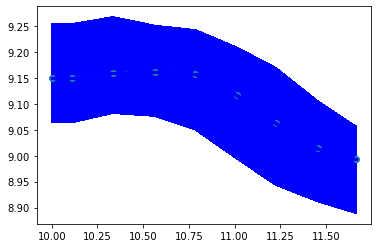

In [414]:
plt.plot(x, y, 'o', xnew, ynew, '-')

plt.errorbar(xnew,ynew,yerr=y_error_n,c='b',marker='o',markersize=1,linestyle='-',linewidth=1.5)

plt.show()

**Hacemos un scatter plot de la masa vs metalicidad junto con la banda media. Podemos elegir algún parámetro para ver como cambia la distribución.**

In [415]:
parametro ='tiempo'

mask = (DF_M['sf_metalicity'].notna())&(DF_M[parametro]<150)&(np.log10(DF_M['Stars_Mass'])>10)&(np.log10(DF_M['Stars_Mass'])<13)&(np.log10(DF_M['Stars_Mass'])<max(x))#&(merge['SubGroupNumber']==0)
xvar = np.log10(DF_M['Stars_Mass'])[mask].to_numpy()
yvar = DF_M['sf_metalicity'][mask].to_numpy()
zvar = DF_M[parametro][mask].to_numpy()

**Separamos las galáxias según su ubucación respecto a la banda media**

In [416]:
gal_sup =[]
gal_inf =[]
gal_mean=[]

for i in np.arange(len(xvar)):
    sup = f(xvar[i]) + f_err_u(xvar[i])- yvar[i]
    inf = f(xvar[i]) - f_err_d(xvar[i])- yvar[i]
    if sup*inf<0:
        gal_mean.append(i)
    elif abs(sup)<abs(inf):
        gal_sup.append(i)
    else: gal_inf.append(i)

In [417]:
residuos = np.ones_like(xvar,dtype=float)

for i in np.arange(len(xvar)):
    residuos[i] = -(f(xvar[i]) - yvar[i])

In [418]:
xvar_sup = np.ones_like(gal_sup,dtype=float)
xvar_inf = np.ones_like(gal_inf,dtype=float)
xvar_mean= np.ones_like(gal_mean,dtype=float)

yvar_sup = np.ones_like(gal_sup,dtype=float)
yvar_inf = np.ones_like(gal_inf,dtype=float)
yvar_mean= np.ones_like(gal_mean,dtype=float)

zvar_sup = np.ones_like(gal_sup,dtype=float)
zvar_inf = np.ones_like(gal_inf,dtype=float)
zvar_mean= np.ones_like(gal_mean,dtype=float)

for i in np.arange(len(gal_sup)):
    xvar_sup[i] = xvar[gal_sup[i]]
    yvar_sup[i] = yvar[gal_sup[i]]
    zvar_sup[i] = zvar[gal_sup[i]]
    
for i in np.arange(len(gal_inf)):
    xvar_inf[i] = xvar[gal_inf[i]]
    yvar_inf[i] = yvar[gal_inf[i]]
    zvar_inf[i] = zvar[gal_inf[i]]
    
for i in np.arange(len(gal_mean)):
    xvar_mean[i] = xvar[gal_mean[i]]
    yvar_mean[i] = yvar[gal_mean[i]]
    zvar_mean[i] = zvar[gal_mean[i]]

In [419]:
xvar = zvar
yvar = residuos

In [420]:
nbins=16        # Numero de bins en variable x a usar para dividir la muestra
perc_low=25.        # Percentil a usar como cota inferior de error
perc_high=75.       # Percentil a usar como cota superior de error
min_count=10         # Mínima cantidad de elementos para considerar en un bin

xmedian,ymedian,xerror,yerror,elements=Curves2D.median_curve(xvar,yvar,bins=nbins,min_count=min_count,
                                                             perc_low=perc_low,perc_high=perc_high)

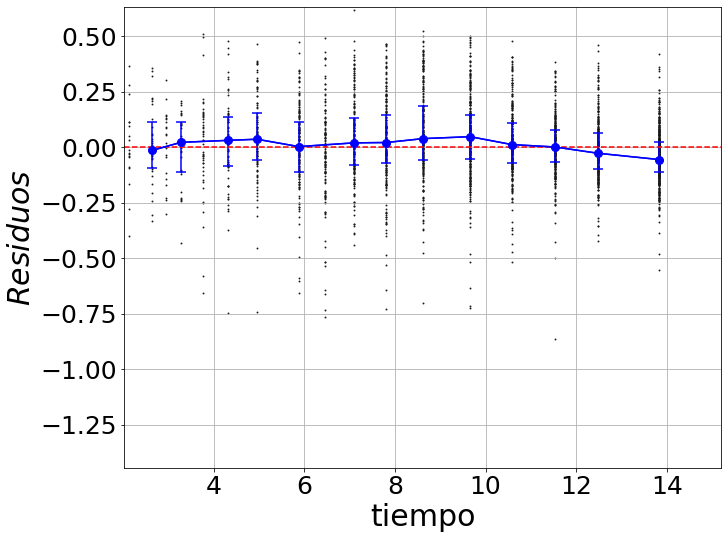

In [421]:
fig,ax=plt.subplots(figsize=(10,8))

xlim=(min(zvar)*0.99-0.1,max(zvar)*1.1)
ylim=(min(residuos)*0.99,max(residuos)*1.02)

xlabel= parametro
ylabel=r'$Residuos$'

ax.set_xlabel(xlabel,fontsize=30)
ax.set_ylabel(ylabel,fontsize=30)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.tick_params(axis='both', which='major', labelsize=25)
                
plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

# scatter plot
ax.scatter(zvar,residuos,marker='o',s=0.8,c='0.1',label='Scatter plot')

ax.plot(xmedian,ymedian,c='b',marker='o',ms=8,linestyle='-',linewidth=1.5,label='Mediana')

ax.errorbar(xmedian,ymedian,yerr=yerror,
           c='b',marker='',markersize=8,linestyle='-',
           linewidth=1.5,label='Percentiles 25º y 75º',capsize=5,capthick=1.5)

# leg1=ax.legend(edgecolor='0.1',loc='lower left',handlelength=4,fontsize=12)
# leg1.set_title(r'$\rm{EAGLE\ RefL0100N1504},\ z=0$',prop={'size':10})

# plt.title('Scatter Plots separando según la ubicación de la media.')

# ax.add_artist(leg1)

plt.grid()    
plt.hlines(0,xlim[0],xlim[1],colors = 'r',linestyles='dashed')


# plt.savefig(path_lin_fig+'residuos_Fgas.png')
plt.show()

In [ ]:
# Fin